In [1]:
import os
import pandas as pd
import numpy as np
import geopandas as gpd
import re
import string
#import unicodedata
#from bs4 import BeautifulSoup
from wordcloud import WordCloud, STOPWORDS

import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import OneHotEncoder 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

import nltk
import spacy
#nltk.download('wordnet')
#nltk.download('averaged_perceptron_tagger')
from nltk.corpus import wordnet as wn
from nltk.stem.wordnet import WordNetLemmatizer

from nltk.corpus import stopwords
stopword_list = stopwords.words('english')

from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.tokenize.toktok import ToktokTokenizer
#from nltk.tokenize.stanford import StanfordTokenizer


from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer

from nltk import ngrams, FreqDist

lemmatizer = WordNetLemmatizer()
tokenizer = ToktokTokenizer()

In [3]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [4]:
from sklearn.ensemble import RandomForestRegressor

In [5]:
import rfpimp

In [6]:
import seaborn as sns

In [7]:
# for lasso
from sklearn.linear_model import LassoCV
import time
import sklearn

In [8]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
stopword_list_new = list(stopword_list)

In [ ]:
# there are several stop word lists below that will be used in the TF-IDF calculating

In [11]:

list_2 =['have_not_test','fit_wardrobe','part_tile','wall_and_base_unit','range_wall',
 'obscure','may','porch','suite_comprise','shower_over','purchase', 'gas_fire',
 'space_and_plumbing', 'potential','seller','panel_bath','brick','breakfast'
 'internal','any_representation_warranty','sink_and_drainer',
 'mixer_tap', 'work_surface','towards', 'under_stair_storage_cupboard',
 'glazing', 'must_verify_the_dimension_carefully','none_rely_upon_statement','prospective_buyer_only','market_this',
 'before_order_carpet','fixture_and_fitting_other','low',
 'would_make','low_flush','detach_bungalow',
 'please','move',
 'white_suite_comprising',
 'shape',
 'workshop',
 'fitting',
 'selection',
 'any_apparatus_equipment_fixture',
 'television_point','block','floor_plan','substantial',
 'extension',
 'pave',
 'half',
 'fitted_wardrobe','wardrobe'
 'time',
 'information',
 'across',
 'approximately',
 'junction',
 'detached',
 'opening',
 'various',
 'efficiency_give_all_measurement',
 'representation_fact_any',
 'than_those_mention_agree','situate_within',
'estate',
 'housing','can_not', 'you_can',
 'electric_fire',
 'it_own',
 'locate_within',
 'choice','build_storage_cupboard','storage_cupboard','air_cupboard',
 'share','walk_distance','within_walk_distance','easy_access','within_easy_reach','family_bathroom','master_bedroom','master',
 'guide_price',
 'serve',
 'internally',
 'advise_that_some',
 'require_clarification_further_information',
 'not_precise_please',
 'particular_may_await',
 'vendor_approval_you',
 'period',
 'buy',
 'open_onto',
 'please_contact_especially_you', 'you_will_find',
 'have_take_guide',
 'variety',
 'step','slide_door','detach_family','viewing',
 'quality',
 'drainer',
 'stun',
 'gas_hob',
 'entrance_porch', 'cupboard_housing',
 'offering',
 'ensuite',
 'detail',
 'lane','velux_window', 'can_find', 'approximate','place',
 'building','cottage','sit',
 'base',
 'stone', 'call',
 'make_our_sale_particular',
 'present',
 'way',
 'enclosed',
 'power',
 'incorporate',
 'staircase','create',
 'space_for_fridge_freezer',
 'sink_unit',
 'stainless_steel_sink',
 'gate','any_point','three_piece','internal','fully']

In [12]:
update_extend_list=[ 'roof', 'guarantee_their_operating_ability','limit_nor_any', 'service_system_and_appliance_list', 'any_built_furniture',
 'size_only_intend','general_guidance_you','price','resident','externally_there','currently','this_specification','top','you_will',
 'it_employee_agent','stair_rise', 'range_base', 'hob', 'without', 'first_time_buyer', 'away', 'suite_comprising', 'together',
 'offer_for_sale', 'beautifully_present', 'extractor', 'shelving','offer_purchase_these', 'secure', 'high',
 'but_not_constitute','matter_refer_these_particular','whatever_relation_this','would_ask_for_your_operation', 'sash_window', 'would','require','system', 'picture_rail','have_any_authority', 'match', 'lead_out',
 'make_give',
 'which_particular_importance',
 'sell', 'bedroom_semi_detached','third',
 'heart',
 'integrate',
 'right',
 'useful',
 'one_and_half_bowl',
 'glass',
 'drawer',
 'tile_splash_back',
 'power_and_light',
 'guest',
 'any_contract',
 'you_please_contact',
 'order_that_there',
 'agent',
 'will_delay_agree',
 'mature',
 'office_and_will',
 'identification_documentation_late_stage', 'corner','purchaser_will_ask_produce',
 'opaque',
 'particular_issue_good_faith', 'any_offer_contract',
 'property_accordingly_strongly',
 'any_the_equipment_appliance',
 'report_before_finalise_their', 'their_own_survey_service',
 'service_please_note',
 'please_check_the_position',
 'you_especially_you_contemplate', 'should_independently_verify_prospective',
 'advise_prospective_buyer_commission']

In [13]:
extended_stopwords = ['bedroom', 'property', 'door', 'rear', 'front', 'two',
       'window', 'kitchen', 'double', 'room', 'area',
       'bathroom', 'upvc_double_glaze', 'large', 'offer', 'side', 'access',
       'window_front', 'space', 'lead', 'also',
       'double_glaze_window', 'include', 'three', 'home',
       'floor', 'house', 'fit', 'aspect', 'one', 'provide', 'feature', 'unit', 'dining_room',
       'open', 'upvc', 'window_side', 'suite', 'road', 'wall', 'door_lead', 'double_glazed', 'well', 'benefit',
       'view', 'light', 'bedroom_one', 'range', 'outside',
       'first_floor', 'storage', 'living_room',
        'separate', 'locate', 'double_glaze',
        'shower_room', 'point', 'private',
        'throughout',
       'accommodation', 'single', 'family', 'ground_floor', 'close',
       'power_point', 'build', 'bay_window', 'apartment', 
       'hallway', 'family_home', 'within', 'front_aspect',
       'entrance_hall', 'rear_elevation', 'location', 'shower',
        
        'four', 'situate', 'set',
        'development', 'wall_mount',
        'enclose', 'living', 'find', 
       'din_room', 'via', 'surround', 'electric', 'build_wardrobe', 'back', 'property_benefit',
       'utility', 'four_bedroom', 'comprise', 'along', 
       'new', 'main', 'flooring', 'boast', 'fit_kitchen', 'extend', 'suite_shower', 'entrance',
       'plus', 'landing', 'level', 'two_double_glaze',
       'second', 'study', 'hall',
       'ceiling', 'downstairs', 'well_present', 'overlook', 'local',
       'give_access', 'patio_door',
       'additional', 'kitchen_breakfast','mile',
      'fit_carpet', 'make', 'look', 'centre',
       'service', 'entrance_door',
       'bedroom_double_glaze', 'kitchen_diner', 'onto', 'tile_floor',
       'available', 'white', 'whilst', 'face', 'part',
       'stair', 'fitted', 'flat',
       
        'stair_first_floor', 'provide_access', 'panel',
       'side_aspect',  'radiator_double_glaze', 'station', 'sit_room',
       'amenity', 'second_floor',
        'modern_fit', 'front_elevation', 
        'far', 'wall_base_unit',
       'double_glazing', 'complete', 'bay', 'sale',
       'family_room', 'bath', 'inset', 'use', 'size',
       'many', 'street', 'impressive', 'range_wall_base', 'rail',
        'loft_access', 'detach', 'max_max', 'car',
       'also_benefit', 'give', 'office', 'externally', 
       'drive', 'built', 'max', 
       'window_overlook', 'link', 'sink', 'first_floor_landing',
       'glaze_window', 'reception', 'heating', 'fit_range',
       'chain', 'lounge_din',  'recess', 'appliance', 'border',
       'low_level', 'finish', 'land', 'bed', 'store', 
        'facility',
       'built_wardrobe',  'hand_basin', 'stair_lead',
        'upstairs', 'ground', 'market', 'coving', 'addition',
       'lighting', 'buyer', 'position', 
       'furniture']

In [14]:
real_estate_stopwords = [
    "area",
    
    "location",
    "plot",
    "hectare",
    "m²",
    "m2",
    "sq",
    "sale",
    "square",
    "meter",
    "bedroom",
    "bathroom",
    "room",
    "living",
    "kitchen",
    "hallway",
    "corridor",
    "dining",
    "apartment",
    "flat",
    "double",
    "two",
    "three",
    "property","also","include","four",
    'door', 'window', 'side', 'home', 'house', 'max_max', 'bungalow',
    'rear', 'front', 'floor', 'aspect', 'unit', 'well', 'within', 'whilst', 'access_via', 'ask_operation_order_delay','check_position_especially_contemplate'
    ,'documentation_late_stage_would','first_floor_three','first','lounge_double_glaze','low_level_wash_hand','max_max_max_max','need','number',
    'please_contact_office_please','point_particular_importance','purchaser_ask_produce_identification','side_elevation','take','three_bedroom',
    'three_double_glaze','upvc_double_glazing','vinyl_flooring','year','window_face','wash_hand_basin','telephone_point','tap','strongly_advise_prospective_buyer',
    'stage_would_ask_operation','room_size_intend','regulation_intend_purchaser_ask', 'representation_fact_form_part','produce_identification_documentation_late',
    'property_measurement_approximate','particular_independently_verify_prospective','offer_contract_matter_refer','make_give_representation_warranty',
    'limit_employee_agent_authority','general_guidance_must_verify','full','fully_enclose', 'fully_fit','fixture_fitting_mention_agree','finalise_offer_purchase_particular',
    'equipment_appliance_property_accordingly', 'equipment_fixture_fitting_service','come', 'commission_survey_service_report','comprises',
 'comprising', 'connect','continue','could','cover','buyer_tenant_neither_sequence','access_loft', 'accommodation_comprise', 'accommodation_comprises','adjacent',
 'allow', 'amenity_include','another','approx', 'around','base_unit', 'base_wall','benefit_include', 'beyond','extensive','external','end','five','live',
 'live_room','there_also','upvc_double','benefit_from','glaze','nearby','glazed','shed','lounge_diner','travel_some_distance_view','heat_towel_rail'
    ]+extended_stopwords+update_extend_list+list_2

In [15]:
len(real_estate_stopwords)

547

In [16]:
stopword_list_new.extend(real_estate_stopwords)

In [17]:
len(stopword_list_new)

726

In [ ]:
# a function for word cloud

def word_cloud(data):
    text = " ".join(review for review in data)
    print ("There are {} words in the combination of all review.".format(len(text)))
    # Generate a word cloud image
    wordcloud = WordCloud(stopwords=stopword_list_new, background_color="white",max_font_size=65,width=800,height=400).generate(text)

    # Display the generated image:
    # the matplotlib way:
    plt.figure(figsize=(15,10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

In [ ]:
# define a function for TF-IDF calculating

def find_text_feature(data):
    corpus = data.tri_gram_replaced.fillna(' ').values
    # make the doc-term matrix
    tfidf = TfidfVectorizer(max_df=.985, min_df=0.025, stop_words=stopword_list_new,use_idf=True, ngram_range=(1,1), norm=None, max_features=200)
    # Fit and Transform the documents
    matrix = tfidf.fit_transform(corpus)  
    matrix_as_array = matrix.toarray()
    #matrix_as_array.shape
    table_tfidf = pd.DataFrame(matrix_as_array,
                        columns=tfidf.get_feature_names())
    return table_tfidf

In [ ]:
# for plot the coefficients
def lasso_plot(X_lasso,Y_lasso,text_feature,region):
    list_alphas = [.000001,.00001,.0001,.001,.01,.1,1]
    start_time = time.time()
    lasso_cv = LassoCV(cv=10, alphas=list_alphas).fit(X_lasso,Y_lasso)
    fit_time = time.time() - start_time
    
    # increase the max_iter to guarantee convergence
    lasso_model = sklearn.linear_model.Lasso(normalize=True, alpha = lasso_cv.alpha_)
    lasso_model.fit(X=X_lasso, y=Y_lasso)
    pred_Y_lasso = lasso_model.predict(X_lasso)
    #pred_test_y = lasso_model.predict(test_x)
    #print('lasso_model.score: ',lasso_model.score(X_lasso, Y_lasso))
    
    print('R2 on all data: ',r2_score(Y_lasso, pred_Y_lasso))
    print('RMSE on all data: ',mean_squared_error(Y_lasso,pred_Y_lasso,squared=False))
    
#     print('R2 on the test data: ',r2_score(test_y, pred_test_y))
#     print('RMSE on the test data: ',mean_squared_error(test_y,pred_test_y,squared=False))
    
    df_coef_lasso = pd.DataFrame({"var": X_lasso.columns.values, "coef":lasso_model.coef_})
    
    df_coef_lasso = df_coef_lasso[df_coef_lasso['var'].isin(text_feature.columns.values.tolist())].sort_values(by='coef',key=abs,ascending=False).head(20)
    df_coef_lasso_1 = df_coef_lasso.sort_values(by='coef',ascending=True)
    coef_color = [{c<0: 'salmon',c>0: 'skyblue'}[True] for c in df_coef_lasso_1.coef]
    
    df_coef_lasso_1.plot(x='var', y='coef', kind='barh',color=coef_color,figsize=(10, 12),fontsize=22,legend=False)
    plt.title('Text features\' coefficients on property price in '+region, fontsize=25)
    #plt.show()
    plt.savefig('data_region/'+region+'_lasso_new.jpg',bbox_inches='tight')

In [ ]:
# for LASSO model and plot
def lasso_and_plot(list_useless_region, table_tfidf, UK_2019sale_month67_region,region):
    text_feature_region = table_tfidf.drop(columns=list_useless_region)
    region_concatenated = pd.concat([UK_2019sale_month67_region, text_feature_region], axis=1)
    region_concatenated = pd.get_dummies(region_concatenated,columns=['property_type'])
    list_property_type = [i for i in region_concatenated.columns.values.tolist() if 'property_type_' in i]
    list_property_type.remove('property_type_Flat')
    
    X_lasso_all = region_concatenated[[ 'price_flag', 'num_bed_last','bed_flag',
       'num_floors_max', 'num_bath_max', 'num_reception_max','len_description']
       +list_property_type+text_feature_region.columns.values.tolist()]
    X_lasso_all = sm.add_constant(X_lasso_all)
    Y_lasso_all = region_concatenated['log_price_last']
    
    #X_lasso, test_x, Y_lasso, test_y = train_test_split(X_lasso_all, Y_lasso_all, test_size=0.6,random_state=42)
    
    
    lasso_plot(X_lasso_all,Y_lasso_all,text_feature_region,region)

In [ ]:
# for the train and test of LASSO model
def lasso_train_test(list_useless_region, table_tfidf, UK_2019sale_month67_region,region):
    text_feature_region = table_tfidf.drop(columns=list_useless_region)
    region_concatenated = pd.concat([UK_2019sale_month67_region, text_feature_region], axis=1)
    region_concatenated = pd.get_dummies(region_concatenated,columns=['property_type'])
    list_property_type = [i for i in region_concatenated.columns.values.tolist() if 'property_type_' in i]
    list_property_type.remove('property_type_Flat')
    
    X_lasso = region_concatenated[[ 'price_flag', 'num_bed_last','bed_flag',
       'num_floors_max', 'num_bath_max', 'num_reception_max','len_description']
       +list_property_type+text_feature_region.columns.values.tolist()]
    X_lasso = sm.add_constant(X_lasso)
    Y_lasso = region_concatenated['log_price_last']
    
    train_x, test_x, train_y, test_y = train_test_split(X_lasso, Y_lasso, test_size=0.6,random_state=42)
    
    
    list_alphas = [.000001,.00001,.0001,.001,.01,.1,1]
    start_time = time.time()
    lasso_cv = LassoCV(cv=10, alphas=list_alphas).fit(X_lasso,Y_lasso)
    fit_time = time.time() - start_time
    
    # increase the max_iter to guarantee convergence
    lasso_model = sklearn.linear_model.Lasso(normalize=True, alpha = lasso_cv.alpha_)
    lasso_model.fit(X=train_x, y=train_y)
    pred_train_y = lasso_model.predict(train_x)
    pred_test_y = lasso_model.predict(test_x)
    #print('lasso_model.score: ',lasso_model.score(X_lasso, Y_lasso))
    
    print('R2 on the training data: ',r2_score(train_y, pred_train_y))
    print('RMSE on the training data: ',mean_squared_error(train_y,pred_train_y,squared=False))
    
    print('R2 on the test data: ',r2_score(test_y, pred_test_y))
    print('RMSE on the test data: ',mean_squared_error(test_y,pred_test_y,squared=False))

## London

In [20]:
UK_2019sale_month67_London = pd.read_csv('data_region/UK_2019sale_month67_london.csv')

In [11]:
corpus_London = UK_2019sale_month67_london.tri_gram_replaced.fillna(' ').values

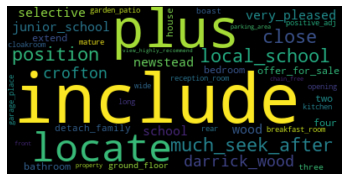

In [139]:
wordcloud = WordCloud().generate(corpus_London[152])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

There are 27144369 words in the combination of all review.


In [145]:
stop_words = set(stopwords.words("english"))

In [ ]:
word_cloud(UK_2019sale_month67_concatenated.tri_gram_replaced)

There are 27144369 words in the combination of all review.


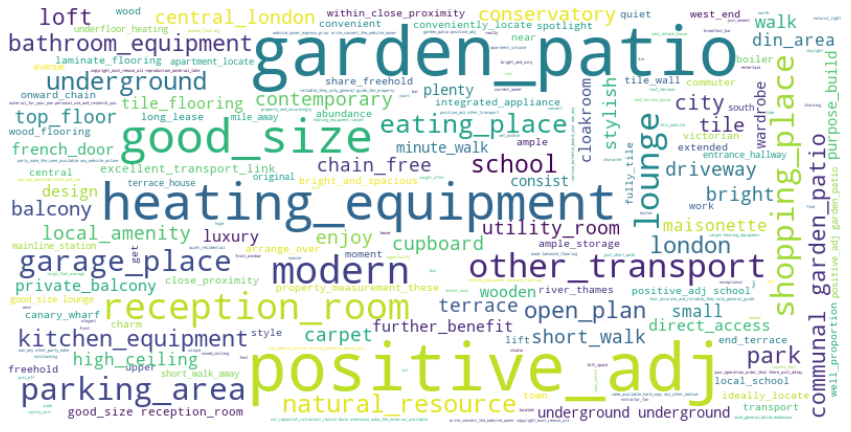

In [18]:
word_cloud(UK_2019sale_month67_london.tri_gram_replaced)

In [113]:
table_tfidf_London = find_text_feature(UK_2019sale_month67_London)

In [21]:
df_London = pd.DataFrame(table_tfidf_London.sum().sort_values(ascending=False))

In [22]:
pd.set_option('display.max_rows', 300)
df_London

,0
heating_equipment,51504.906526
garden_patio,51324.010186
positive_adj,49012.307471
good_size,26106.663932
underground,23055.171771
modern,20825.609249
park,19895.691008
reception_room,19274.416927
shopping_place,19022.201790
other_transport,18585.858047


In [24]:
df_London.index.values

array(['heating_equipment', 'garden_patio', 'positive_adj', 'good_size',
       'underground', 'modern', 'park', 'reception_room',
       'shopping_place', 'other_transport', 'lounge', 'natural_resource',
       'school', 'bathroom_equipment', 'parking_area', 'garage_place',
       'london', 'eating_place', 'kitchen_equipment', 'carpet',
       'communal', 'laminate_flooring', 'open_plan', 'city', 'tile',
       'loft', 'balcony', 'conservatory', 'wood', 'walk', 'enjoy',
       'central_london', 'bright', 'terrace', 'cupboard', 'contemporary',
       'tile_flooring', 'style', 'utility_room', 'tile_wall', 'driveway',
       'local_amenity', 'design', 'short_walk', 'top_floor', 'chain_free',
       'minute', 'stylish', 'town_centre', 'north', 'local_school',
       'south', 'town', 'small', 'mainline_station', 'central',
       'wardrobe', 'maisonette', 'victorian', 'wood_flooring', 'wooden',
       'west', 'boiler', 'luxury', 'mile_away', 'minute_walk', 'avenue',
       'high_ceiling', 

In [114]:
# manually select the useless words, the rest are the features 
list_useless_London = [ 'directly', 'array', 'this_website','feel','well_proportion', 'wide', 'interior',  'near', 'get', 'stair_first',
       'arrange_over','numerous', 'just_off','located','set_within', 'zone',
       'party_make_the_same_available','property_measurement_these',
       'not_republish_retransmit_redistribute',
       'otherwise_make_the_material_available','please_call']

In [64]:
[i for i in df_London.index.values.tolist() if i not in list_useless_London]

['heating_equipment',
 'garden_patio',
 'positive_adj',
 'good_size',
 'underground',
 'modern',
 'park',
 'reception_room',
 'shopping_place',
 'other_transport',
 'lounge',
 'natural_resource',
 'school',
 'bathroom_equipment',
 'parking_area',
 'garage_place',
 'london',
 'eating_place',
 'kitchen_equipment',
 'carpet',
 'communal',
 'laminate_flooring',
 'open_plan',
 'city',
 'tile',
 'loft',
 'balcony',
 'conservatory',
 'wood',
 'walk',
 'enjoy',
 'central_london',
 'bright',
 'terrace',
 'cupboard',
 'contemporary',
 'tile_flooring',
 'style',
 'utility_room',
 'tile_wall',
 'driveway',
 'local_amenity',
 'design',
 'short_walk',
 'top_floor',
 'chain_free',
 'minute',
 'stylish',
 'town_centre',
 'north',
 'local_school',
 'south',
 'town',
 'small',
 'mainline_station',
 'central',
 'wardrobe',
 'maisonette',
 'victorian',
 'wood_flooring',
 'wooden',
 'west',
 'boiler',
 'luxury',
 'mile_away',
 'minute_walk',
 'avenue',
 'high_ceiling',
 'french_door',
 'purpose_build',
 'c

In [26]:
text_feature_London = table_tfidf_London.drop(columns=list_useless_London)

In [27]:
text_feature_London

,abundance,ample,ample_storage,apartment_locate,avenue,balcony,bar,bathroom_equipment,boiler,bright,...,victorian,walk,wardrobe,west,west_end,within_close_proximity,wood,wood_flooring,wooden,work
0,0.0,0.0,0.0,4.561917,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0000,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,2.917586,3.959235,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,11.597217,0.0000,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,8.752758,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0000,0.0,0.0
3,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0000,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,2.917586,0.000000,0.0,...,0.0,0.000000,8.415649,0.0,0.0,0.0,0.000000,4.6197,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23211,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,3.504611,0.000000,0.0,0.0,0.0,0.000000,0.0000,0.0,0.0
23212,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0000,0.0,0.0
23213,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0000,0.0,0.0
23214,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0000,0.0,0.0


In [28]:
London_concatenated = pd.concat([UK_2019sale_month67_london, text_feature_London], axis=1)

### LASSO

In [29]:
London_concatenated = pd.get_dummies(London_concatenated,columns=['property_type'])

In [97]:
London_concatenated.columns.values

array(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'listing_id',
       'start_date', 'end_date', 'price_last', 'price_flag',
       'num_bed_last', 'bed_flag', 'num_floors_max', 'num_bath_max',
       'num_reception_max', 'pcu', 'lon', 'lat_left', 'address',
       'street_name', 'property_num', 'post_town', 'country', 'county',
       'category', 'description', 'lad20nm', 'log_price_last',
       'nuts118cd', 'nuts118nm', 'description_norm', 'tokens',
       'tokens_len', 'len_description', 'bi_gram_tokens',
       'bi_gram_token_list', 'tri_gram_token', 'tri_gram_token_list',
       'tri_gram_replaced', 'abundance', 'ample', 'ample_storage',
       'apartment_locate', 'avenue', 'balcony', 'bar',
       'bathroom_equipment', 'boiler', 'bright', 'bright_and_airy',
       'bright_and_spacious', 'bus', 'canary_wharf', 'carpet', 'central',
       'central_london', 'chain_free', 'charm', 'cinema', 'city',
       'cloakroom', 'close_proximity', 'communal', 'commuter',
       'connectio

In [102]:
text_feature_London.columns.values

array(['abundance', 'ample', 'ample_storage', 'apartment_locate',
       'avenue', 'balcony', 'bar', 'bathroom_equipment', 'boiler',
       'bright', 'bright_and_airy', 'bright_and_spacious', 'bus',
       'canary_wharf', 'carpet', 'central', 'central_london',
       'chain_free', 'charm', 'cinema', 'city', 'cloakroom',
       'close_proximity', 'communal', 'commuter', 'connection',
       'conservatory', 'consist', 'contemporary', 'convenient',
       'conveniently_locate', 'court', 'crossrail', 'cupboard', 'design',
       'din_area', 'direct_access', 'driveway', 'east', 'eating_place',
       'end_terrace', 'enjoy', 'entertain', 'entrance_hallway',
       'excellent_transport_link', 'extended', 'extractor_fan',
       'freehold', 'french_door', 'fully_tile', 'further_benefit',
       'garage_place', 'garden_patio', 'good_size', 'gym',
       'heating_equipment', 'high_ceiling', 'ideally_locate',
       'integrated_appliance', 'kitchen_equipment', 'laminate_flooring',
       'lease',

## Scotland

In [21]:
UK_2019sale_month67_Scotland = pd.read_csv('data_region/UK_2019sale_month67_Scotland.csv')

There are 19995596 words in the combination of all review.


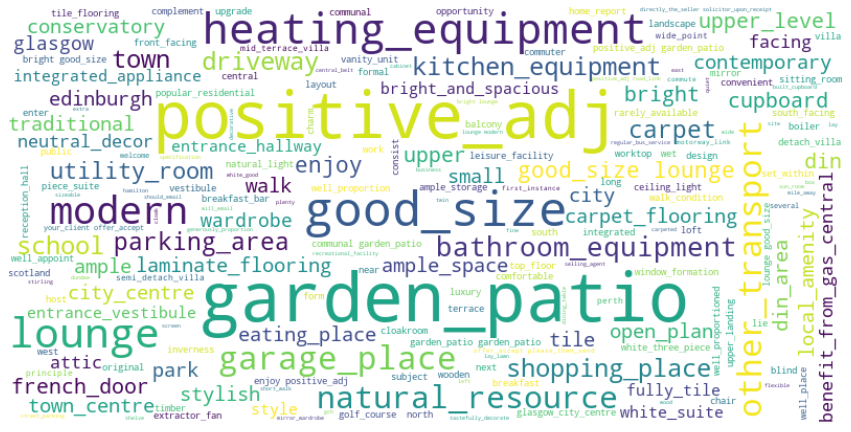

In [155]:
word_cloud(UK_2019sale_month67_Scotland.tri_gram_replaced)

In [22]:
table_Scotland = find_text_feature(UK_2019sale_month67_Scotland)

In [59]:
table_Scotland.shape

(10376, 200)

In [53]:
table_Scotland.sum().sort_values(ascending=False)

garden_patio                33546.000748
positive_adj                33478.560720
heating_equipment           18674.527253
good_size                   18651.475249
lounge                      17690.250765
modern                      14335.498156
natural_resource            12549.865815
other_transport             11769.562783
garage_place                11253.864009
shopping_place              10530.390938
town                         9976.867410
kitchen_equipment            9696.534241
school                       9079.302175
carpet                       8828.939041
bathroom_equipment           8683.376164
enjoy                        7846.072453
park                         7818.797180
parking_area                 7726.947547
driveway                     7667.422341
bright                       7359.147213
edinburgh                    6892.283727
utility_room                 6744.596301
glasgow                      6626.178923
cupboard                     6180.565788
ample           

In [58]:
table_Scotland.sum().sort_values(ascending=False).index.tolist()

['garden_patio',
 'positive_adj',
 'heating_equipment',
 'good_size',
 'lounge',
 'modern',
 'natural_resource',
 'other_transport',
 'garage_place',
 'shopping_place',
 'town',
 'kitchen_equipment',
 'school',
 'carpet',
 'bathroom_equipment',
 'enjoy',
 'park',
 'parking_area',
 'driveway',
 'bright',
 'edinburgh',
 'utility_room',
 'glasgow',
 'cupboard',
 'ample',
 'laminate_flooring',
 'ceiling_light',
 'carpet_flooring',
 'din',
 'upper',
 'walk',
 'eating_place',
 'city_centre',
 'city',
 'town_centre',
 'open_plan',
 'tile',
 'small',
 'local_amenity',
 'communal',
 'french_door',
 'upper_level',
 'stylish',
 'central',
 'conservatory',
 'traditional',
 'home_report',
 'wardrobe',
 'contemporary',
 'ample_space',
 'din_area',
 'golf_course',
 'entrance_hallway',
 'timber',
 'bright_and_spacious',
 'commuter',
 'neutral_decor',
 'inverness',
 'south',
 'scotland',
 'style',
 'attic',
 'glasgow_city_centre',
 'set_within',
 'facing',
 'north',
 'natural_light',
 'west',
 'dundee'

In [23]:
list_useless_Scotland = ['enter','next', 'band', 'work','layout','estate_agent','host', 'form',
 'breakfast','entry','selling_agent', 'near', 'subject','well_place',
 'present_the_market','contact','long','deep','complement','white_three_piece','consist','opportunity', 'sitting_room',
 'good_range','business','wide_range', 'both_primary','entrance_hallway','din_area','home_report',
 'wardrobe','central','upper_level',
 'district','din',
 'upper',
 'walk',
 'wide_point',
 'purchaser','lay',
 'several']

In [61]:
len(list_useless_Scotland)

41

In [63]:
text_feature_Scotland = table_Scotland.drop(columns=list_useless_Scotland)

In [64]:
Scotland_concatenated = pd.concat([UK_2019sale_month67_Scotland, text_feature_Scotland], axis=1)

### LASSO


In [65]:
Scotland_concatenated = pd.get_dummies(Scotland_concatenated,columns=['property_type'])

In [67]:
Scotland_concatenated.columns.values

array(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'listing_id',
       'start_date', 'end_date', 'price_last', 'price_flag',
       'num_bed_last', 'bed_flag', 'num_floors_max', 'num_bath_max',
       'num_reception_max', 'pcu', 'lon', 'lat_left', 'address',
       'street_name', 'property_num', 'post_town', 'country', 'county',
       'category', 'description', 'lad20nm', 'log_price_last',
       'nuts118cd', 'nuts118nm', 'description_norm', 'tokens',
       'tokens_len', 'len_description', 'bi_gram_tokens',
       'bi_gram_token_list', 'tri_gram_token', 'tri_gram_token_list',
       'tri_gram_replaced', 'aberdeen', 'academy', 'ample', 'ample_space',
       'ample_storage', 'attic', 'avenue', 'balcony', 'bank',
       'base_and_wall', 'bathroom_equipment', 'benefit_from_gas_central',
       'blind', 'boiler', 'breakfast_bar', 'bridge', 'bright',
       'bright_and_spacious', 'carpet', 'carpet_flooring', 'carpeted',
       'castle', 'ceiling_light', 'central_belt', 'charm', 'city'

In [151]:
Y_lasso_Scotland = Scotland_concatenated['log_price_last']

In [79]:
# 'property_type_Flat',
X_lasso_Scotland = Scotland_concatenated[[ 'price_flag', 'num_bed_last','bed_flag',
       'num_floors_max', 'num_bath_max', 'num_reception_max','len_description',
        
        'property_type_Barn conversion', 'property_type_Block of flats',
       'property_type_Bungalow', 'property_type_Chalet',
       'property_type_Cottage', 'property_type_Country house',
       'property_type_Detached bungalow', 'property_type_Detached house',
       'property_type_End terrace house',
       'property_type_Equestrian property', 'property_type_Farm',
       'property_type_Farmhouse', 
       'property_type_Hotel/guest house', 'property_type_Land',
       'property_type_Link-detached house', 'property_type_Lodge',
       'property_type_Maisonette', 'property_type_Mews house',
       'property_type_Mobile/park home', 'property_type_Parking/garage',
       'property_type_Semi-detached bungalow',
       'property_type_Semi-detached house', 'property_type_Studio',
       'property_type_Terraced bungalow', 'property_type_Terraced house',
       'property_type_Town house', 'property_type_Villa'                       
        
       ]+text_feature_Scotland.columns.values.tolist()]

In [80]:
X_lasso_Scotland = sm.add_constant(X_lasso_Scotland)

F:\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [71]:
X_lasso

,const,price_flag,num_bed_last,bed_flag,num_floors_max,num_bath_max,num_reception_max,len_description,property_type_Barn conversion,property_type_Block of flats,...,well_proportion,well_proportioned,west,west_end,wet,white_suite,wide,wood,wooden,worktops
0,1.0,1,3,1,0,2,3,630,0,0,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,4.304548,0.000000,11.934752,0.0
1,1.0,1,2,1,0,0,0,692,0,0,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
2,1.0,2,2,1,0,2,0,148,0,0,...,0.000000,0.0,0.0,13.220116,0.0,0.000000,0.000000,3.830615,0.000000,0.0
3,1.0,1,2,1,0,0,0,504,0,0,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
4,1.0,1,5,1,0,3,2,955,0,0,...,3.858786,0.0,0.0,0.000000,0.0,0.000000,0.000000,3.830615,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10371,1.0,1,2,1,0,0,0,626,0,0,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
10372,1.0,1,4,1,0,2,3,653,0,0,...,3.858786,0.0,0.0,4.406705,0.0,3.513945,0.000000,0.000000,0.000000,0.0
10373,1.0,1,2,1,0,1,3,528,0,0,...,3.858786,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
10374,1.0,1,3,1,0,1,1,304,0,0,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0


In [72]:
list_alphas = [.000001,.00001,.0001,.001,.01,.1,1]

start_time = time.time()
lasso_cv = LassoCV(cv=10, alphas=list_alphas).fit(X_lasso,Y_lasso)
fit_time = time.time() - start_time

In [73]:
# increase the max_iter to guarantee convergence
lasso_model = sklearn.linear_model.Lasso(normalize=True, alpha = lasso_cv.alpha_)
lasso_model.fit(X=X_lasso, y=Y_lasso)
print(lasso_model.score(X_lasso, Y_lasso))

0.6090120530236407


In [74]:
df_coef_lasso = pd.DataFrame({"var": X_lasso.columns.values, "coef":lasso_model.coef_})

In [75]:
df_coef_lasso_1 = df_coef_lasso[df_coef_lasso['var'].isin(text_feature_Scotland.columns.values.tolist()) & df_coef_lasso['coef']!=0].sort_values(by='coef',ascending=True)

<AxesSubplot:title={'center':"Text features' coefficients on property price(log) in London"}, ylabel='var'>

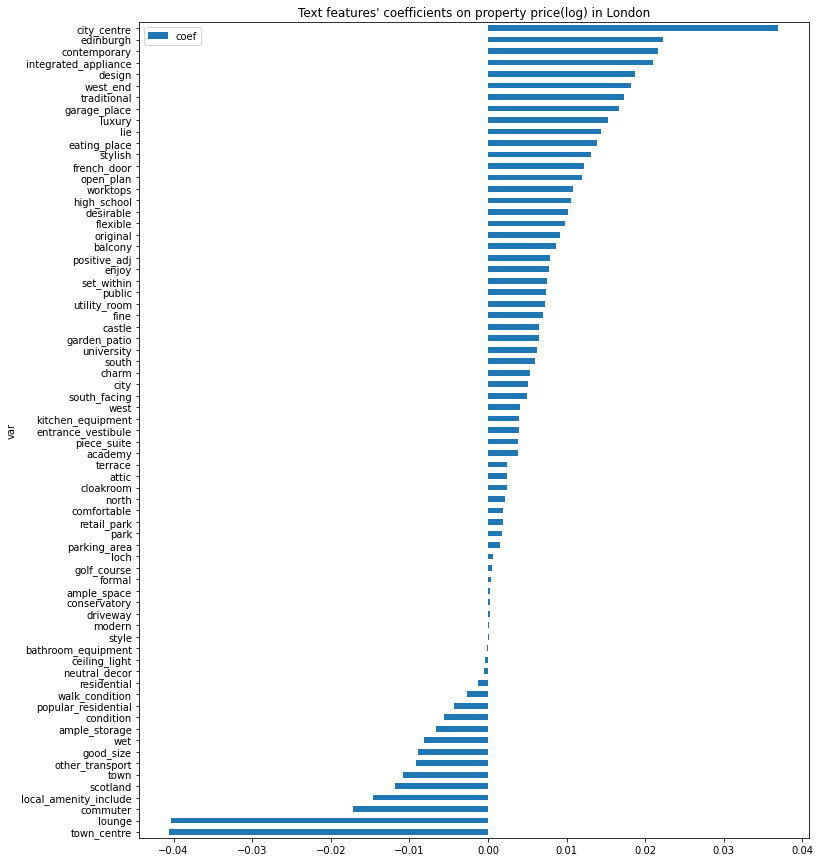

In [77]:
df_coef_lasso_1.plot(x='var', y='coef', kind='barh',figsize=(12, 15),fontsize=10,title='Text features\' coefficients on property price(log) in London')

In [83]:
lasso_train_test(list_useless_Scotland, table_Scotland, UK_2019sale_month67_Scotland,'Scotland')

F:\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


R2 on the training data:  0.6167614280771583
RMSE on the training data:  0.39671059786270063
R2 on the test data:  0.617932471965783
RMSE on the test data:  0.3856740667420214


In [25]:
lasso_train_test(list_useless_Scotland, table_Scotland, UK_2019sale_month67_Scotland,'Scotland')

F:\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


R2 on the training data:  0.6167614280771583
RMSE on the training data:  0.39671059786270063
R2 on the test data:  0.617932471965783
RMSE on the test data:  0.3856740667420214


F:\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


R2 on all data:  0.6090120530236407
RMSE on all data:  0.3944223003340357
Wall time: 1.19 s


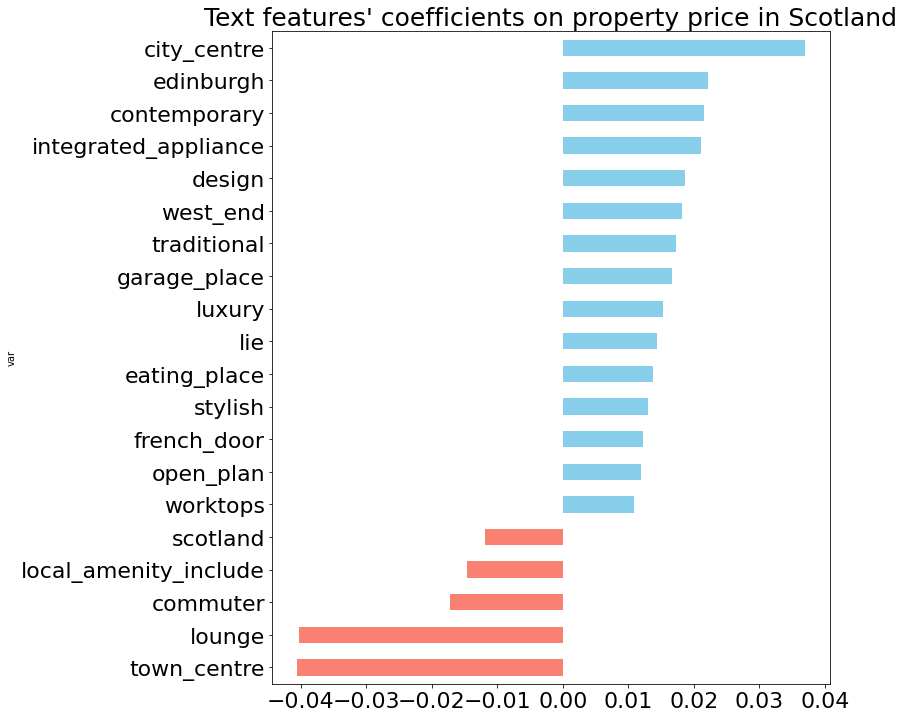

In [71]:
%%time
lasso_and_plot(list_useless_Scotland, table_Scotland, UK_2019sale_month67_Scotland,'Scotland')

F:\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


lasso_model.score:  0.6343539443336943
R2 on all data:  0.6343539443336943
RMSE on all data:  0.38142593835090577


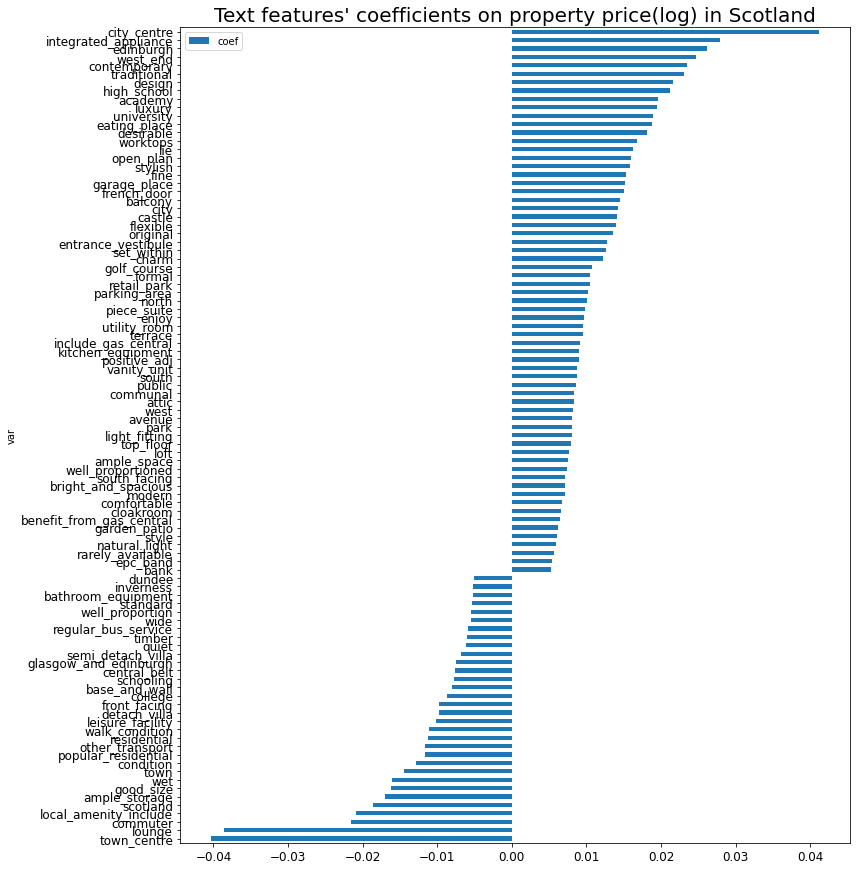

Wall time: 3.29 s


In [35]:
%%time
lasso_and_plot(list_useless_Scotland, table_Scotland, UK_2019sale_month67_Scotland,'Scotland')

F:\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


R2 on all data:  0.6090120530236407
RMSE on all data:  0.3944223003340357


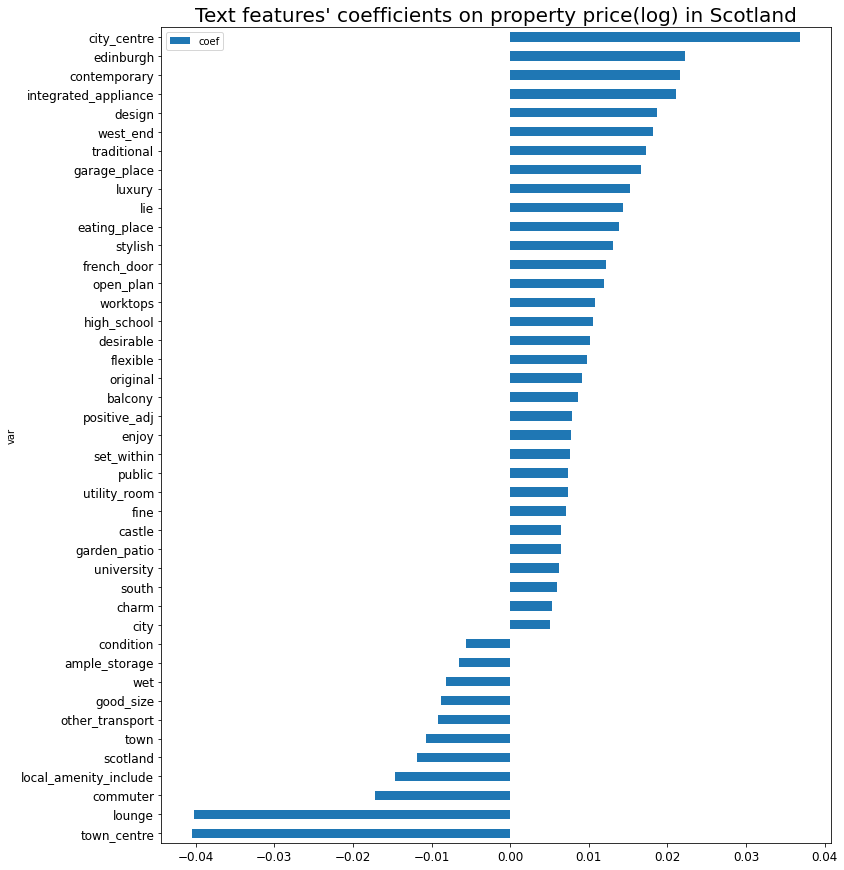

Wall time: 1.39 s


In [92]:
%%time
lasso_and_plot_1(list_useless_Scotland, table_Scotland, UK_2019sale_month67_Scotland,'Scotland')

F:\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


lasso_model.score:  0.6090120530236407
R-squared value:  0.6090120530236407
RMSE value:  0.3944223003340357


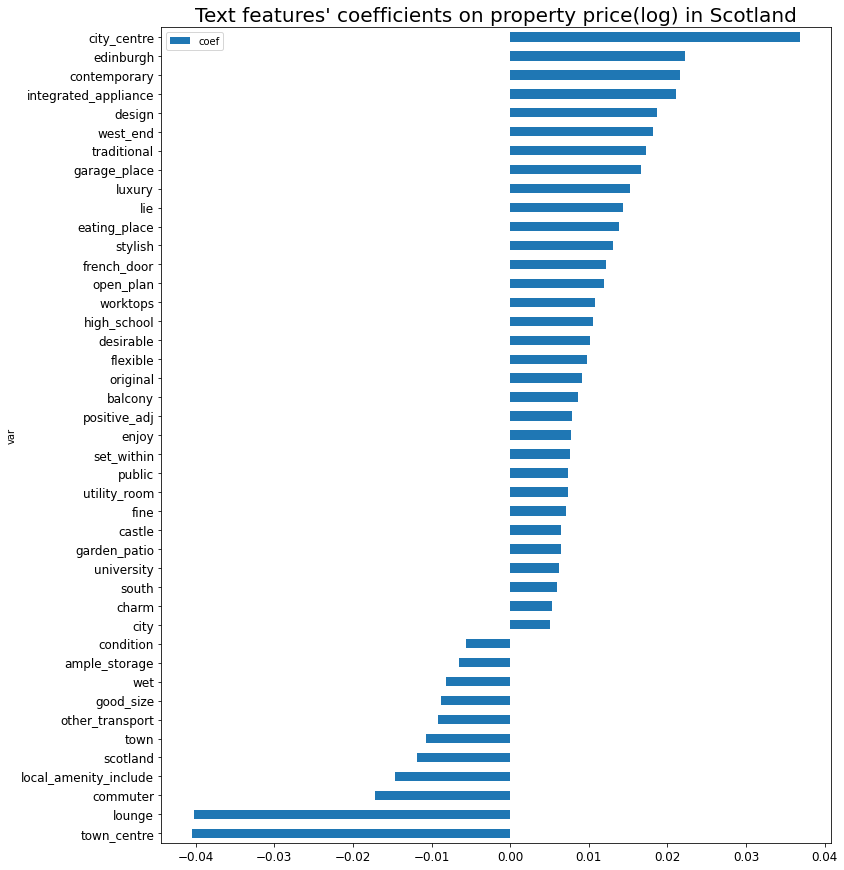

Wall time: 1.46 s


In [31]:
%%time
lasso_and_plot(list_useless_Scotland, table_Scotland, UK_2019sale_month67_Scotland,'Scotland')

## East Midlands

In [72]:
UK_2019sale_month67_East_Midlands = pd.read_csv('data_region/UK_2019sale_month67_East Midlands (England).csv')

There are 37626521 words in the combination of all review.


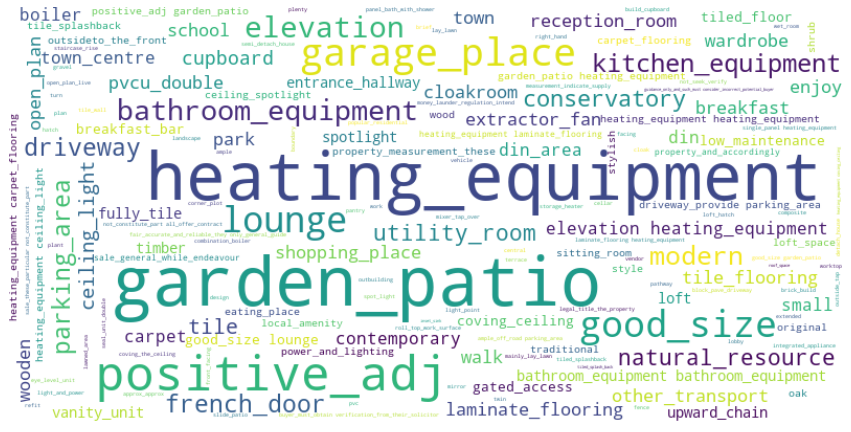

In [89]:
word_cloud(UK_2019sale_month67_East_Midlands.tri_gram_replaced)

In [73]:
table_East_Midlands = find_text_feature(UK_2019sale_month67_East_Midlands)

In [91]:
table_East_Midlands.shape

(14395, 200)

In [94]:
table_East_Midlands.sum().sort_values(ascending=False).index.tolist()

['heating_equipment',
 'garden_patio',
 'positive_adj',
 'garage_place',
 'good_size',
 'bathroom_equipment',
 'lounge',
 'elevation',
 'ceiling_light',
 'natural_resource',
 'parking_area',
 'kitchen_equipment',
 'conservatory',
 'modern',
 'driveway',
 'laminate_flooring',
 'utility_room',
 'tile',
 'school',
 'park',
 'french_door',
 'cupboard',
 'carpet_flooring',
 'tile_flooring',
 'shopping_place',
 'other_transport',
 'wardrobe',
 'reception_room',
 'open_plan',
 'extractor_fan',
 'carpet',
 'enjoy',
 'town',
 'cloakroom',
 'wooden',
 'coving_ceiling',
 'town_centre',
 'boiler',
 'breakfast',
 'walk',
 'small',
 'timber',
 'leicester',
 'style',
 'din',
 'spotlight',
 'tile_wall',
 'contemporary',
 'eating_place',
 'entrance_hallway',
 'fully_tile',
 'wood',
 'local_amenity',
 'oak',
 'driveway_provide',
 'communal',
 'din_area',
 'loft',
 'original',
 'coving_the_ceiling',
 'vanity_unit',
 'nottingham',
 'ceiling_spotlight',
 'gas',
 'tiled_floor',
 'upward_chain',
 'low_mainte

In [74]:
list_useless_East_Midlands = ['comprise_entrance_hall','fire','outside_tap', 'left_hand_side',
 'privacy','must', 'brief','right_hand','money_launder_regulation_intend', 'cellar', 'fair_accurate_and_reliable_they',
 'sale_general_while_endeavour', 'property_and_accordingly','only_general_guide', 'original','coving_the_ceiling', 'boiler',
 'breakfast','walk','small','occupy', 'provide_ample', 'eye_level_unit', 'twin', 'board', 'outsideto_the_front',
 'combination_boiler', 'corner_plot', 'public_house', 'roll_top_work_surface', 'mortgage', 'screen','base_level',
 'low_level_pedestal_wash','beneath','chrome_heat_towel_rail','gravel',
 'lay_lawn','plan', 'outbuilding', 'design', 'low_level_flush', 'central', 'ample', 'work',
 'stair_first', 'vehicle', 'power_and_lighting', 'staircase_rise','mainly_lay_lawn', 'tile_splashbacks', 'stand', 'property_measurement_these',
 'boundary', 'estate_agent', 'these_particular', 'piece_suite_comprise', 'must_view', 'separate_dining', 'pleasant', 'light_and_power',
 'form_part_any','sink_with_mixer_tap','note','raise',
 'roll_edge_work_surface', 'particular', 'work_surface_over', 'turn', 'contact', 'inset_sink', 'verification_from_their_solicitor',
 'buyer_must_obtain', 'legal_title_the_property', 'not_seek_verify',]

In [98]:
text_feature_East_Midlands = table_East_Midlands.drop(columns=list_useless_East_Midlands)

In [99]:
East_Midlands_concatenated = pd.concat([UK_2019sale_month67_East_Midlands, text_feature_East_Midlands], axis=1)

In [101]:
East_Midlands_concatenated = pd.get_dummies(East_Midlands_concatenated,columns=['property_type'])

In [121]:
list_property_type = [i for i in East_Midlands_concatenated.columns.values.tolist() if 'property_type_' in i]

In [124]:
list_property_type.remove('property_type_Flat')

In [126]:
print(list_property_type)

['property_type_Barn conversion', 'property_type_Block of flats', 'property_type_Bungalow', 'property_type_Chalet', 'property_type_Cottage', 'property_type_Country house', 'property_type_Detached bungalow', 'property_type_Detached house', 'property_type_End terrace house', 'property_type_Equestrian property', 'property_type_Farm', 'property_type_Farmhouse', 'property_type_Houseboat', 'property_type_Land', 'property_type_Leisure/hospitality', 'property_type_Link-detached house', 'property_type_Lodge', 'property_type_Maisonette', 'property_type_Mews house', 'property_type_Mobile/park home', 'property_type_Parking/garage', 'property_type_Semi-detached bungalow', 'property_type_Semi-detached house', 'property_type_Studio', 'property_type_Terraced bungalow', 'property_type_Terraced house', 'property_type_Town house', 'property_type_Villa']


In [32]:
%%time
lasso_train_test(list_useless_London, table_tfidf_London, UK_2019sale_month67_London,'London')

F:\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


R2 on the training data:  0.5600744646731881
RMSE on the training data:  0.4035301845044584
R2 on the test data:  0.4712697764394256
RMSE on the test data:  0.4433310222593552
Wall time: 1.76 s


F:\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


R2 on all data:  0.5062334677687118
RMSE on all data:  0.4280590317463616
Wall time: 15.6 s


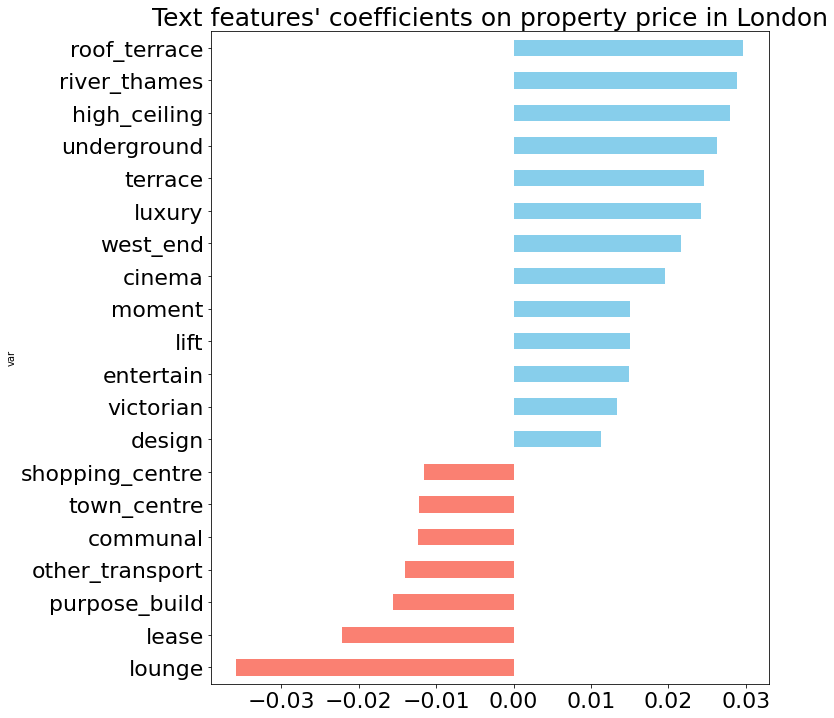

In [115]:
%%time
lasso_and_plot(list_useless_London, table_tfidf_London, UK_2019sale_month67_London,'London')

In [76]:
lasso_train_test(list_useless_East_Midlands, table_East_Midlands, UK_2019sale_month67_East_Midlands,'East Midlands')

NameError: name 'lasso_train_test' is not defined

F:\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


R2 on all data:  0.6688009585857289
RMSE on all data:  0.3158367516358763
Wall time: 1.65 s


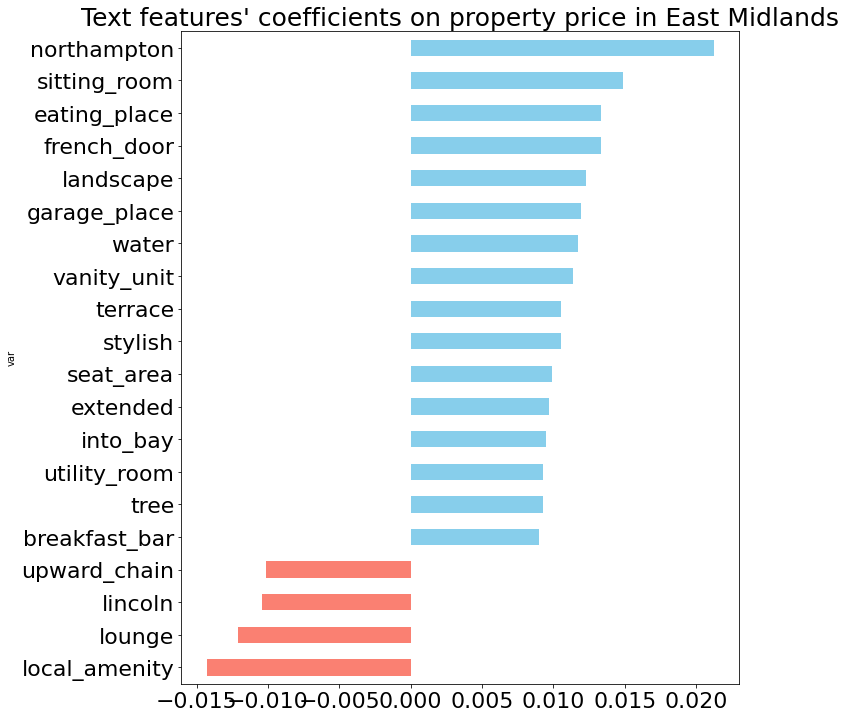

In [77]:
%%time
lasso_and_plot(list_useless_East_Midlands, table_East_Midlands, UK_2019sale_month67_East_Midlands,'East Midlands')

F:\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


lasso_model.score:  0.6688009585857289
R-squared value:  0.6688009585857289
RMSE value:  0.3158367516358763
Wall time: 5.78 s


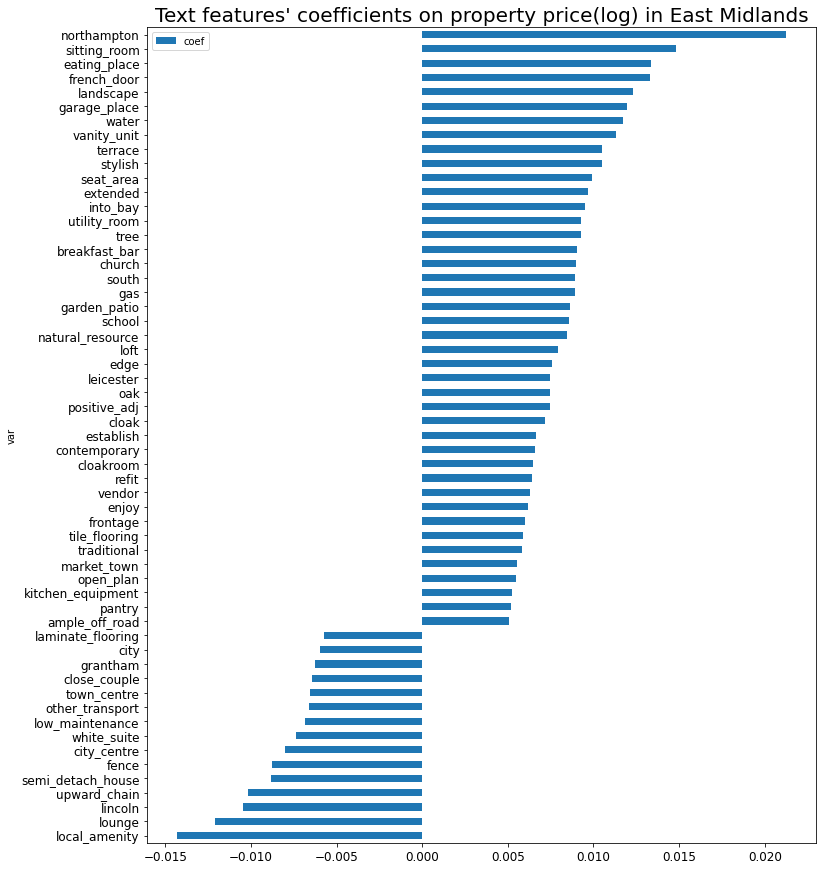

In [276]:
%%time
lasso_and_plot(list_useless_East_Midlands, table_East_Midlands, UK_2019sale_month67_East_Midlands,'East Midlands')

## East of England

In [78]:
UK_2019sale_month67_East_of_England = pd.read_csv('data_region/UK_2019sale_month67_East of England.csv')

There are 44719342 words in the combination of all review.


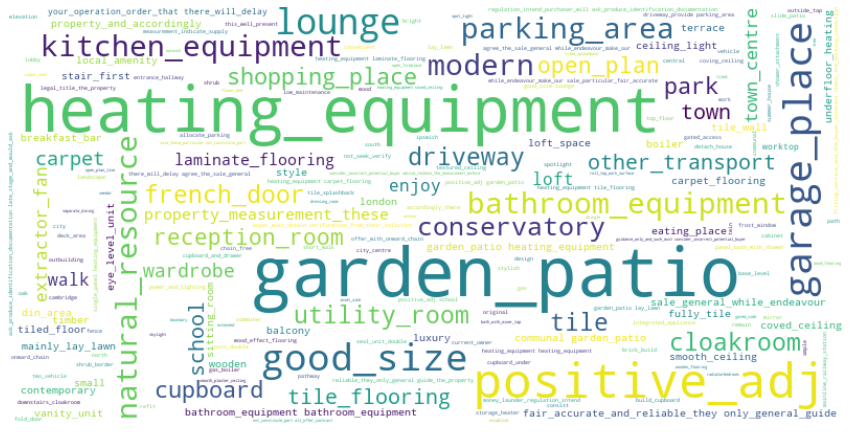

In [140]:
word_cloud(UK_2019sale_month67_East_of_England.tri_gram_replaced)

In [79]:
table_tfidf_East_of_England = find_text_feature(UK_2019sale_month67_East_of_England)

In [74]:
table_tfidf_East_of_England.shape

(21018, 200)

In [145]:
table_tfidf_East_of_England.sum().sort_values(ascending=False).index.tolist()

['heating_equipment',
 'garden_patio',
 'positive_adj',
 'bathroom_equipment',
 'garage_place',
 'natural_resource',
 'good_size',
 'lounge',
 'kitchen_equipment',
 'parking_area',
 'modern',
 'conservatory',
 'school',
 'park',
 'shopping_place',
 'tile',
 'tile_flooring',
 'driveway',
 'carpet',
 'laminate_flooring',
 'cupboard',
 'utility_room',
 'french_door',
 'cloakroom',
 'other_transport',
 'town',
 'open_plan',
 'wardrobe',
 'carpet_flooring',
 'coved_ceiling',
 'communal',
 'town_centre',
 'reception_room',
 'extractor_fan',
 'eating_place',
 'enjoy',
 'coving_ceiling',
 'style',
 'tile_wall',
 'walk',
 'boiler',
 'stair_first',
 'small',
 'wooden',
 'london',
 'cambridge',
 'fully_tile',
 'norwich',
 'timber',
 'loft',
 'spotlight',
 'wood',
 'north',
 'lay_lawn',
 'contemporary',
 'city',
 'wood_effect_flooring',
 'gas',
 'terrace',
 'vanity_unit',
 'oak',
 'tiled_floor',
 'balcony',
 'only_general_guide',
 'property_measurement_these',
 'loft_space',
 'fair_accurate_and_re

In [80]:
list_useless_East_of_England = ['work_surface_over', 'current_owner', 'time','unit_with_mixer_tap',
 'inset_stainless_steel','top_floor', 'plan', 'while_endeavour_make_our','piece_suite_comprise',
 'sale_particular_fair_accurate','onward_chain','guide_the_property','walk','money_launder_regulation_intend',
 'late_stage_and_would_ask', 'there_will_delay', 'chrome_heat_towel_rail', 'sale_general_while_endeavour',
 'your_operation_order_that','work','eye_level_unit','central', 'stair_first',
 'regulation_intend_purchaser_will', 'fair_accurate_and_reliable_they',
 'property_and_accordingly', 'agree_the_sale_general',
 'ask_produce_identification_documentation',
 'inset_sink', 'reliable_they_only_general',
 'accordingly_there', 'only_general_guide',
 'property_measurement_these',
 'measure','independent', 'please_call',
 'gated_access',
 'panel_enclose',
 'mile_away',
 'storage_shed',
 'roll_top_work_surface',
 'range_fitted',
 'delight_offer_for_sale', 'visit', 'single_drainer_sink',
 'this_well_present',
 'short_walk',
 'agent_note',
 'all_offer_contract',
 'extractor_over',
 'buyer_must_obtain',
 'legal_title_the_property',
 'not_seek_verify',
 'verification_from_their_solicitor']

In [37]:
%%time
lasso_train_test(list_useless_East_of_England, table_tfidf_East_of_England, UK_2019sale_month67_East_of_England,'East of England')

F:\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


R2 on the training data:  0.5288419236231181
RMSE on the training data:  0.3887076470247633
R2 on the test data:  0.5103066260660132
RMSE on the test data:  0.3920715042477165
Wall time: 1.74 s


F:\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


R2 on all data:  0.500465386754257
RMSE on all data:  0.39770819708609395
Wall time: 1.85 s


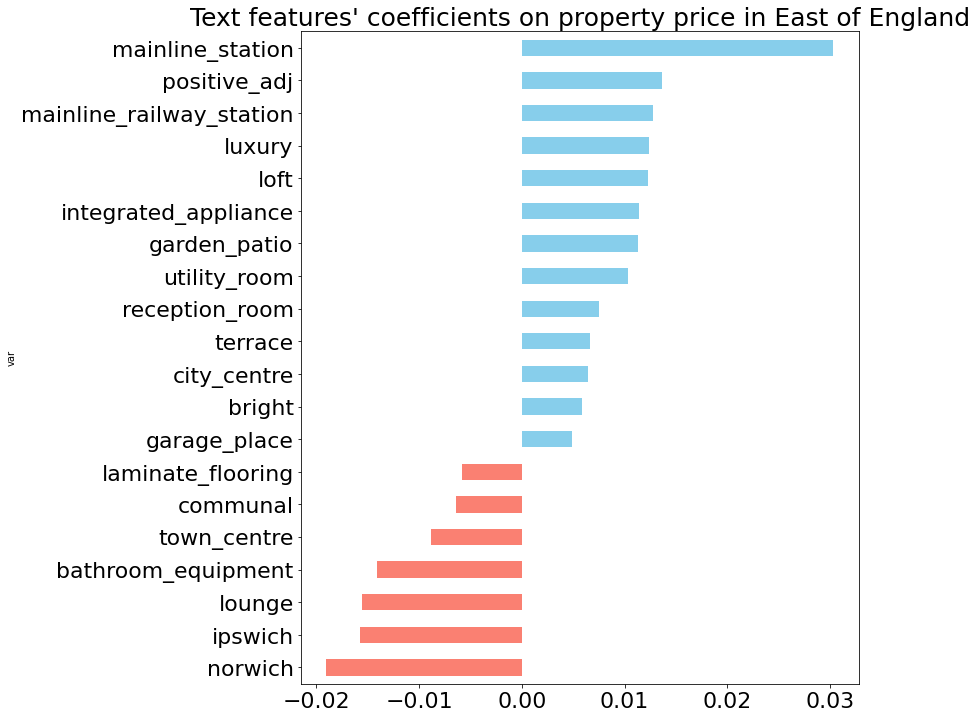

In [81]:
%%time
lasso_and_plot(list_useless_East_of_England, table_tfidf_East_of_England, UK_2019sale_month67_East_of_England,'East of England')

In [96]:
lasso_train_test(list_useless_East_of_England, table_tfidf_East_of_England, UK_2019sale_month67_East_of_England,'East of England')

F:\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


R2 on the training data:  0.5288419236231181
RMSE on the training data:  0.3887076470247633
R2 on the test data:  0.5103066260660132
RMSE on the test data:  0.3920715042477165


F:\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


lasso_model.score:  0.500465386754257
R-squared value:  0.500465386754257
RMSE value:  0.39770819708609395
Wall time: 22.6 s


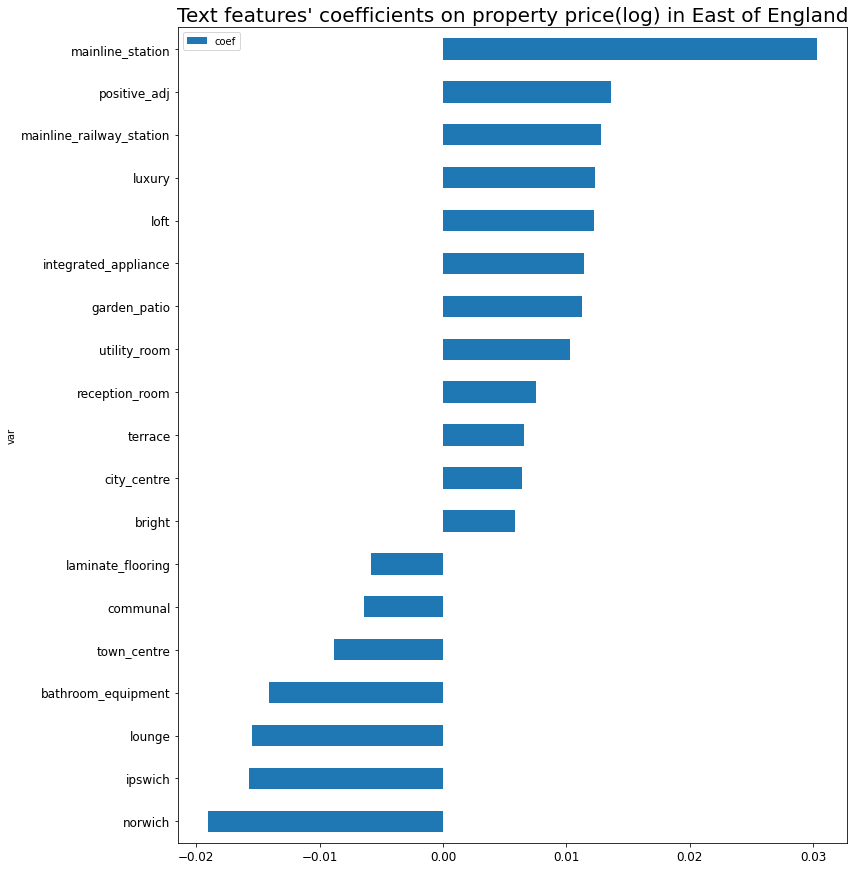

In [277]:
%%time
lasso_and_plot(list_useless_East_of_England, table_tfidf_East_of_England, UK_2019sale_month67_East_of_England,'East of England')

## North East

In [82]:
UK_2019sale_month67_North_East = pd.read_csv('data_region/UK_2019sale_month67_North East (England).csv')

In [178]:
len(UK_2019sale_month67_North_East)

6443

In [83]:
table_tfidf_North_East = find_text_feature(UK_2019sale_month67_North_East)

In [177]:
table_tfidf_North_East.shape

(6443, 200)

In [180]:
table_tfidf_North_East.sum().sort_values(ascending=False).index.tolist()

['heating_equipment',
 'garden_patio',
 'positive_adj',
 'good_size',
 'lounge',
 'garage_place',
 'bathroom_equipment',
 'modern',
 'natural_resource',
 'kitchen_equipment',
 'parking_area',
 'driveway',
 'laminate_flooring',
 'conservatory',
 'shopping_place',
 'tile',
 'park',
 'french_door',
 'elevation',
 'school',
 'open_plan',
 'utility_room',
 'other_transport',
 'carpet',
 'newcastle',
 'walk',
 'reception_room',
 'carpet_flooring',
 'coving_ceiling',
 'cupboard',
 'enjoy',
 'stair_first',
 'entrance_hallway',
 'wardrobe',
 'local_amenity',
 'eating_place',
 'tile_flooring',
 'durham',
 'small',
 'town',
 'tile_wall',
 'town_centre',
 'contemporary',
 'extractor_fan',
 'cloakroom',
 'loft',
 'din',
 'wood',
 'they_not_constitute',
 'style',
 'form_part_offer',
 'din_area',
 'accurate_and_reliable_however',
 'fully_tile',
 'stylish',
 'epc_rating',
 'cramlington',
 'vanity_unit',
 'spotlight',
 'auction',
 'newcastle_city_centre',
 'boiler',
 'city',
 'important_note_purchaser_

In [84]:
list_useless_North_East = ['either','not_rely', 'breakfasting_kitchen', 'gated_access', 'feel', 'white_three_piece',
 'sized','extractor_hood',  'this_website', 'feature_fire','fire','near', 'they_not_constitute',
 'style', 'accurate_and_reliable_however', 'stair_first',
 'form_part_offer',
 'particular', 'central', 'set_out', 'lie', 'upper_chain', 'original',
 'breakfast',
 'part_offer_contract',
 'pleasant',
 'unit_with_mixer_tap',
 'must',
 'machine',
 'gas',
 'call_now',
 'work_order_fit',
 'contrast_work_surface',
 'new_home',
 'contain',
 'your_solicitor',
 'supply',
 'colour', 'these_detail', 'must_view','intend_purchaser_should', 'please_call',
 'residential_and_commercial', 'next', 'can_help','chrome_heat_towel_rail',
 'convert',
 'work',
 'north_and_chartered_surveyor',
 'management_survey_and_valuation',
 'roll_top_work_surface',
 'briefly_comprising',
 'hand',
 'must_satisfy_themselves_inspection',
 'base_and_drawer',
 'agent_the_northandrew_craig',

 'sale_conveyancing_letting',
 'local_amenity_include',
 'give_notice']

In [41]:
lasso_train_test(list_useless_North_East, table_tfidf_North_East, UK_2019sale_month67_North_East,'North East')

F:\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


R2 on the training data:  0.6505846809183707
RMSE on the training data:  0.39311498409664386
R2 on the test data:  0.5762252278766904
RMSE on the test data:  0.4425313805887872


F:\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


R2 on all data:  0.6260961992906837
RMSE on all data:  0.4120937084355309
Wall time: 4.25 s


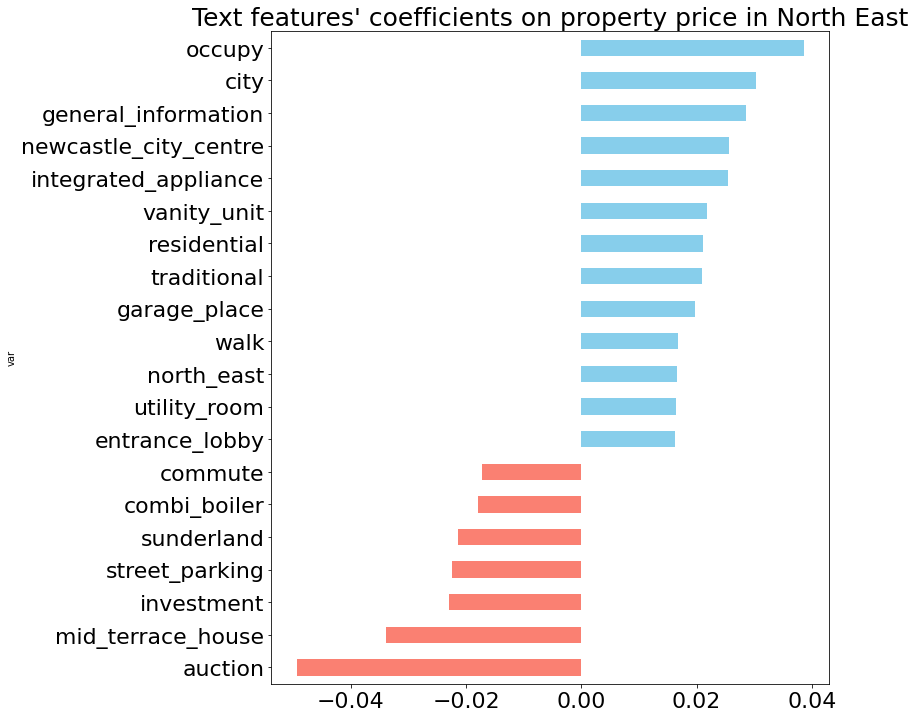

In [85]:
%%time
lasso_and_plot(list_useless_North_East, table_tfidf_North_East, UK_2019sale_month67_North_East,'North East')

F:\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


lasso_model.score:  0.6260961992906837
R-squared value:  0.6260961992906837
RMSE value:  0.4120937084355309
Wall time: 2.6 s


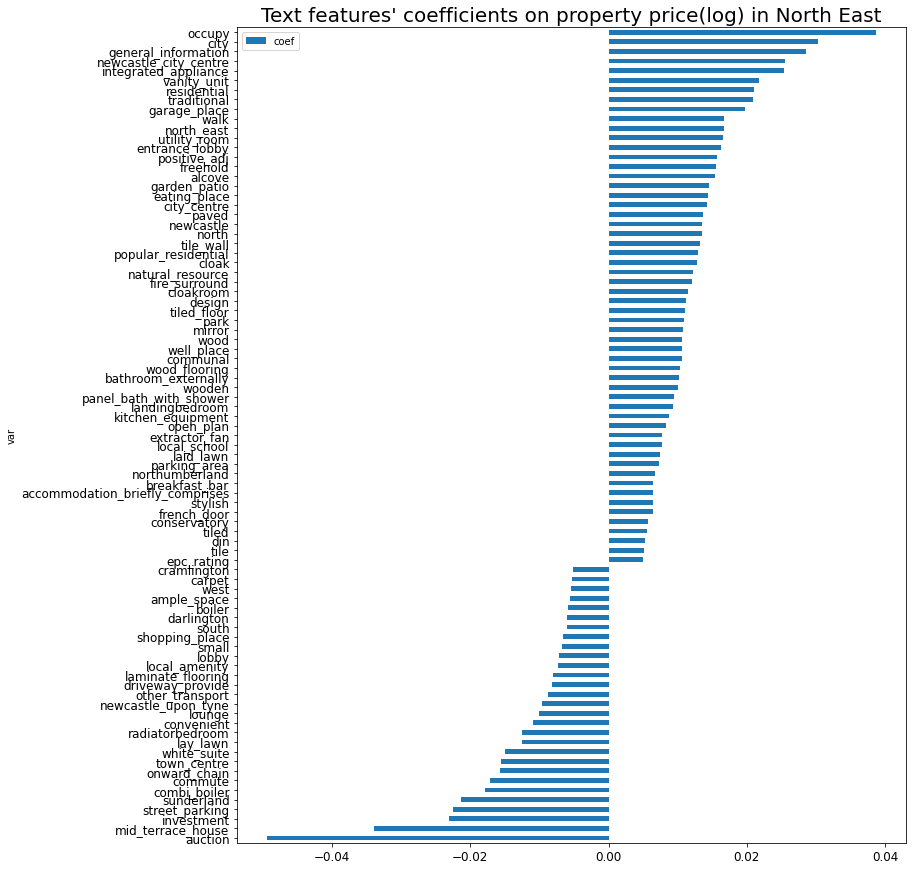

In [278]:
%%time
lasso_and_plot(list_useless_North_East, table_tfidf_North_East, UK_2019sale_month67_North_East,'North East')

## North West

In [86]:
UK_2019sale_month67_North_West = pd.read_csv('data_region/UK_2019sale_month67_North West (England).csv')

In [87]:
table_tfidf_North_West = find_text_feature(UK_2019sale_month67_North_West)

In [186]:
table_tfidf_North_West.shape

(22014, 200)

In [185]:
table_tfidf_North_West.sum().sort_values(ascending=False).index.tolist()

['heating_equipment',
 'garden_patio',
 'positive_adj',
 'good_size',
 'ceiling_light',
 'lounge',
 'bathroom_equipment',
 'garage_place',
 'modern',
 'kitchen_equipment',
 'parking_area',
 'laminate_flooring',
 'elevation',
 'natural_resource',
 'carpet_flooring',
 'reception_room',
 'conservatory',
 'driveway',
 'other_transport',
 'park',
 'tile',
 'carpet',
 'school',
 'tile_flooring',
 'utility_room',
 'french_door',
 'open_plan',
 'city',
 'shopping_place',
 'enjoy',
 'din',
 'walk',
 'spotlight',
 'cupboard',
 'communal',
 'tile_wall',
 'wardrobe',
 'entrance_hallway',
 'style',
 'manchester',
 'wooden',
 'extractor_fan',
 'boiler',
 'local_amenity',
 'liverpool',
 'contemporary',
 'town_centre',
 'small',
 'loft',
 'wood',
 'stylish',
 'town',
 'fully_tile',
 'din_area',
 'original',
 'cloakroom',
 'coved_ceiling',
 'terrace',
 'oak',
 'breakfast',
 'city_centre',
 'eating_place',
 'glaze_frost',
 'stair_first',
 'central',
 'wood_effect_flooring',
 'traditional',
 'driveway_pr

In [88]:
list_useless_North_West = [ 'reliable_however_they', 'this_well_present', 'get','register_below_for_info_pack',
 'please_call','briefly_comprises', 'compliment', 'estate_agent', 'gated_access',
 'personal_use_and_research_you','please_note_that', 'site', 'they_not_constitute',
 'four_piece','work',
 'this_website',
 'otherwise_make_the_material_available',
 'not_republish_retransmit_redistribute',
 'gas', 'buy_let',
 'form_part_offer',
 'accurate_and_reliable_however',
 'own_any',
 'copyright_must_remain_all',
 'service_bulletin_board_your',
 'any_website_online',
 'reproduction_material_take',
 'same_available_hard_copy',
 'any_other_medium',
 'ground_floorentrance', 'plenty',
 'write_consent_the_website_owner',
 'website_owner_express_prior',
 'store_and_use', 'complement',
 'you_may_download',
 'material_for_your_own',
 'staircase_lead', 'integrated', 'accommodation_briefly',
 'composite', 'corner_plot', 'important_note_purchaser_endeavour',
 'head',
 'feel',
 'bathroom_externally',
 'more_information_call_today',
 'extended',
 'board',
 'interior',
 'grow_family',
 'day',
 'occupy',
 'entrance_vestibule',
 'not_constitute_form_part',
 'abundance',
 'fully_appreciate',
 'accommodation_briefly_comprises',
 'hand',]

In [45]:
lasso_train_test(list_useless_North_West, table_tfidf_North_West, UK_2019sale_month67_North_West,'North West')

F:\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


R2 on the training data:  0.5992012790354486
RMSE on the training data:  0.383540013867809
R2 on the test data:  0.6032964248112471
RMSE on the test data:  0.3755040305538956


F:\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


R2 on all data:  0.5831657957588899
RMSE on all data:  0.3874218171897522
Wall time: 4.35 s


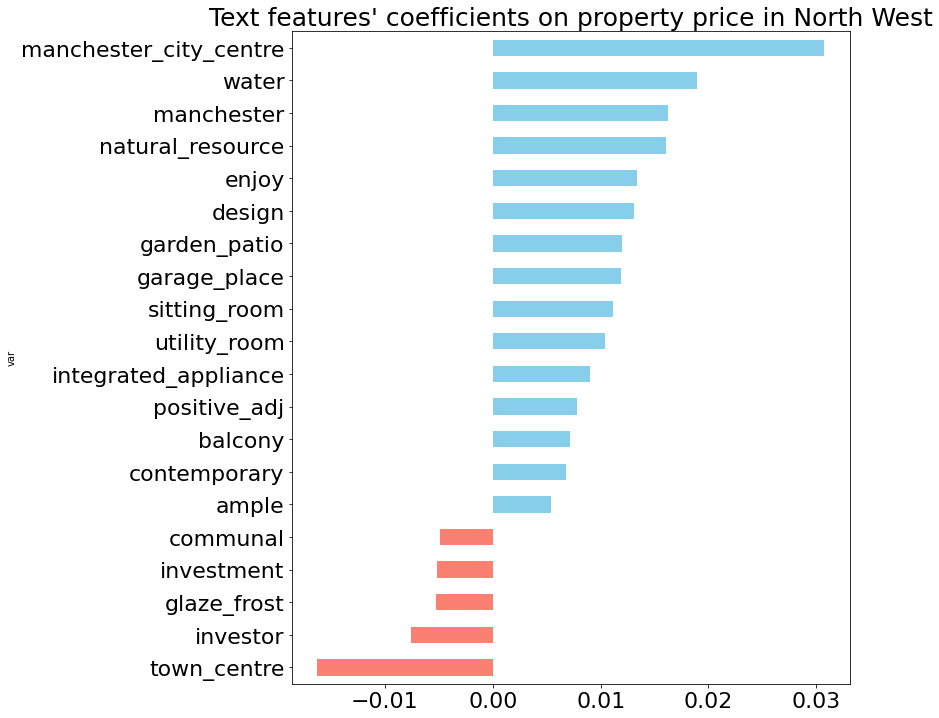

In [89]:
%%time
lasso_and_plot(list_useless_North_West, table_tfidf_North_West, UK_2019sale_month67_North_West,'North West')

F:\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


lasso_model.score:  0.5831657957588899
R-squared value:  0.5831657957588899
RMSE value:  0.3874218171897522
Wall time: 7 s


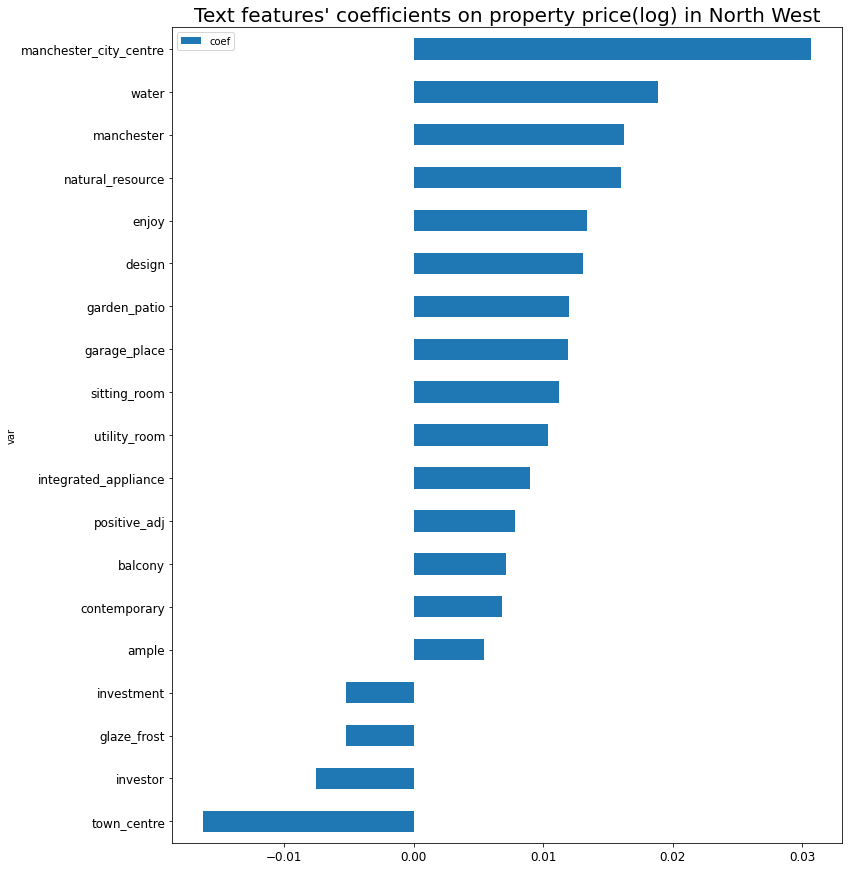

In [279]:
%%time
lasso_and_plot(list_useless_North_West, table_tfidf_North_West, UK_2019sale_month67_North_West,'North West')

## Northern Ireland

In [90]:
UK_2019sale_month67_Northern_Ireland = pd.read_csv('data_region/UK_2019sale_month67_Northern Ireland.csv')

In [91]:
table_tfidf_Northern_Ireland = find_text_feature(UK_2019sale_month67_Northern_Ireland)

In [191]:
table_tfidf_Northern_Ireland.shape

(365, 200)

In [192]:
table_tfidf_Northern_Ireland.sum().sort_values(ascending=False).index.tolist()

['garden_patio',
 'positive_adj',
 'heating_equipment',
 'bathroom_equipment',
 'lounge',
 'good_size',
 'garage_place',
 'modern',
 'kitchen_equipment',
 'tiled_floor',
 'laminate_wooden',
 'belfast',
 'tile',
 'single_panel',
 'parking_area',
 'natural_resource',
 'pvc',
 'extractor_fan',
 'open_plan',
 'din_area',
 'driveway',
 'laminate_flooring',
 'fully_tile',
 'sized',
 'wooden',
 'form_part_offer',
 'they_not_constitute',
 'accurate_and_reliable_however',
 'park',
 'site',
 'utility_room',
 'tile_flooring',
 'carpet',
 'important_note_purchaser_endeavour',
 'ample',
 'luxury',
 'ceramic_tile_floor',
 'wide_point',
 'wood',
 'wood_effect_laminate_flooring',
 'din',
 'school',
 'french_door',
 'cloakroom',
 'newtownards',
 'white_suite',
 'chrome_dual',
 'other_transport',
 'ceramic_tile_flooring',
 'robe',
 'carpeted',
 'bright',
 'reception_room',
 'plumbed_for_wash_machine',
 'bangor',
 'city_centre',
 'contemporary',
 'sun_room',
 'please_note_that',
 'single_drainer_stainles

In [92]:
list_useless_Northern_Ireland = ['can_book', 'panel_bath_with_mixer_tap', 'unit_with_mixer_tap',
 'outside_tap', 'epcimportant_note_purchaser_endeavour','will_appeal', 'furniture_will',
 'need_accurate_measurement','moveable_item_describe','take_such', 'disclaimer_these_particular',
 'tarmac_driveway', 'must', 'oil_tank', 'bangor', 'robe',
 'solicitor_should_confirm', 'communal', 'newtownards','pvc',
 'part_offer_contract', 'please_note_that', 'important_note_purchaser_endeavour',
 'ample',
 'single_drainer_stainless_steel', 'chrome_dual',
 'set_out', 'press',
 'open_fire',
 'walk',
 'otherwise_their_accuracy',
 'sale_particular_and_fact',
 'vendo_solicitorspossessionvacant_possession_upon',
 'representation_fact_but',
 'not_rely_them_statement',
 'not_infer',
 'tenureto_confirm',
 'their_purpose_furthermore',
 'verify_they',
 'they_should',
 'must_satisfy_themselves_inspection',
 'marketing_negotiation_although_try',
 'work_order_fit',
 'circumstance_change_during',
 'general_guideline_and_not_constitute',
 'intend_purchaser_should',
 'fitting_service',
 'measurement_themselves_photograph_reproduce',
 'ensure_accuracy_measurement',
 'general_information',
 'completionviewingviewing_strictly',
 'include_the_sale_since',
 'appointment_through_the_express_estate',
 'agency',
 'listing_they_may',
 'all_interest',
 'any_item',
 'approximate_therefore_intend_purchaser',
 'early_viewing_highly_recommended',
 'order_carpeting_ensure_exist',
 'description_the_express_estate', 'agency_proud_offer', 'dual_flush',
 'key_feature_guide_price','just_off',
 'telephone',
 'further_information', 'low_flush_pedestal_wash', 'overhead',
 'key',
 'route', 'style',
 'central',
 'further_benefit',
 'close_hand',
 'early_view',
 'this_well_present',
 'outsidefront',
 'purchaser',
 'invite_guide_price',
 'can_book']

In [54]:
lasso_train_test(list_useless_Northern_Ireland, table_tfidf_Northern_Ireland, UK_2019sale_month67_Northern_Ireland,'Northern_Ireland')

F:\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


R2 on the training data:  0.5818333731103411
RMSE on the training data:  0.3510534283158792
R2 on the test data:  0.4757958336043414
RMSE on the test data:  0.34924398039076693


In [232]:
text_feature_Northern_Ireland = table_tfidf_Northern_Ireland.drop(columns=list_useless_Northern_Ireland)

In [233]:
Northern_Ireland_concatenated = pd.concat([UK_2019sale_month67_Northern_Ireland, text_feature_Northern_Ireland], axis=1)

In [234]:
Northern_Ireland_concatenated = pd.get_dummies(Northern_Ireland_concatenated,columns=['property_type'])
list_property_type = [i for i in Northern_Ireland_concatenated.columns.values.tolist() if 'property_type_' in i]
list_property_type.remove('property_type_Flat')

In [237]:
X_lasso_Northern_Ireland = Northern_Ireland_concatenated[[ 'price_flag', 'num_bed_last','bed_flag',
       'num_floors_max', 'num_bath_max', 'num_reception_max','len_description']
       +list_property_type+text_feature_Northern_Ireland.columns.values.tolist()]
Y_lasso_Northern_Ireland = Northern_Ireland_concatenated['log_price_last']

In [238]:
list_alphas = [.000001,.00001,.0001,.001,.01,.1,1]
start_time = time.time()
lasso_cv = LassoCV(cv=10, alphas=list_alphas).fit(X_lasso_Northern_Ireland,Y_lasso_Northern_Ireland)
fit_time = time.time() - start_time

In [239]:
lasso_model = sklearn.linear_model.Lasso(normalize=True, alpha = lasso_cv.alpha_)
lasso_model.fit(X=X_lasso_Northern_Ireland, y=Y_lasso_Northern_Ireland)
print('lasso_model.score ='+ str(lasso_model.score(X_lasso_Northern_Ireland, Y_lasso_Northern_Ireland)))

lasso_model.score =0.2853917754368228


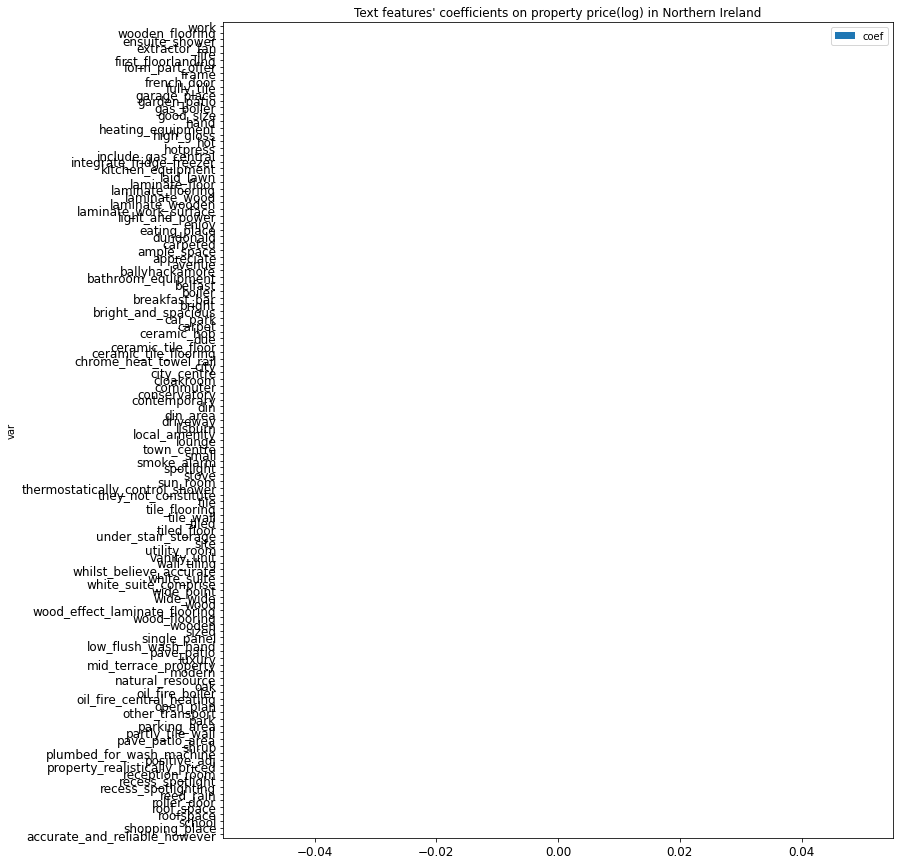

In [243]:
df_coef_lasso = pd.DataFrame({"var": X_lasso_Northern_Ireland.columns.values, "coef":lasso_model.coef_})
df_coef_lasso_1 = df_coef_lasso[df_coef_lasso['var'].isin(text_feature_Northern_Ireland.columns.values.tolist()) ].sort_values(by='coef',ascending=True)
df_coef_lasso_1.plot(x='var', y='coef', kind='barh',figsize=(12, 15),fontsize=12,title='Text features\' coefficients on property price(log) in '+'Northern Ireland')
plt.savefig('data_region/'+'Northern Ireland'+'_lasso.jpg')

In [245]:
df_coef_lasso_1

,var,coef
20,accurate_and_reliable_however,-0.0
107,shopping_place,-0.0
106,school,0.0
105,roofspace,-0.0
104,roof_space,0.0
103,roller_door,0.0
102,reed_rain,-0.0
101,recess_spotlighting,0.0
100,recess_spotlight,-0.0
99,reception_room,0.0


## South East

In [93]:
UK_2019sale_month67_South_East = pd.read_csv('data_region/UK_2019sale_month67_South East (England).csv')

In [94]:
table_tfidf_South_East = find_text_feature(UK_2019sale_month67_South_East)

In [202]:
table_tfidf_South_East.shape

(32450, 200)

In [203]:
table_tfidf_South_East.sum().sort_values(ascending=False).index.tolist()

['garden_patio',
 'heating_equipment',
 'positive_adj',
 'natural_resource',
 'good_size',
 'garage_place',
 'bathroom_equipment',
 'lounge',
 'modern',
 'school',
 'parking_area',
 'kitchen_equipment',
 'park',
 'shopping_place',
 'other_transport',
 'conservatory',
 'driveway',
 'cupboard',
 'town',
 'enjoy',
 'eating_place',
 'tile',
 'cloakroom',
 'utility_room',
 'communal',
 'carpet',
 'town_centre',
 'open_plan',
 'london',
 'reception_room',
 'french_door',
 'walk',
 'wardrobe',
 'laminate_flooring',
 'small',
 'tile_flooring',
 'balcony',
 'terrace',
 'contemporary',
 'boiler',
 'loft',
 'style',
 'plenty',
 'extractor_fan',
 'elevation',
 'wooden',
 'central',
 'wood',
 'tile_wall',
 'south',
 'west',
 'din_area',
 'fully_tile',
 'mainline_station',
 'downstairs_cloakroom',
 'north',
 'ample',
 'sitting_room',
 'local_amenity',
 'stair_first',
 'bright',
 'design',
 'stylish',
 'commuter',
 'oak',
 'work',
 'oxford',
 'minute',
 'brighton',
 'local_school',
 'mile_away',
 'or

In [95]:
list_useless_South_East = ['good_range','add','screen','description','feel',
 'opportunity', 'public_house','day', 'character', 'stair_first',
 'top_floor','mile_away', 'minute',
 'original',
 'short_walk',
 'current_owner', 'base_level',
 'panel_enclose',
 'really',
 'time',
 'several',
 'work_order_fit',
 'detach_house',
 'lot',
 'run',
 'your_solicitor','hour', 'vehicle', 'will_find',
 'chain_free','yet','near','acre',
 'upstairs_there',
 'path',
 'din',
 'follow',
 'extended',
 'please_call',
 'see',
 'consist',
 'plan', 'outside_tap',
 'much',
 'unique',
 'rise',
 'set_within',
 'convert',
 'numerous',
 'lie',
 'fine',
 'all_dimension_approximate',
 'edge',
 'arrange',
 'their_accuracy_can']

In [52]:
lasso_train_test(list_useless_South_East, table_tfidf_South_East, UK_2019sale_month67_South_East,'South East')

F:\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


R2 on the training data:  0.6664172264943384
RMSE on the training data:  0.3374880984941512
R2 on the test data:  0.6370309276585265
RMSE on the test data:  0.35393592624848313


F:\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


R2 on all data:  0.6515236765656387
RMSE on all data:  0.3460606089314054
Wall time: 4.17 s


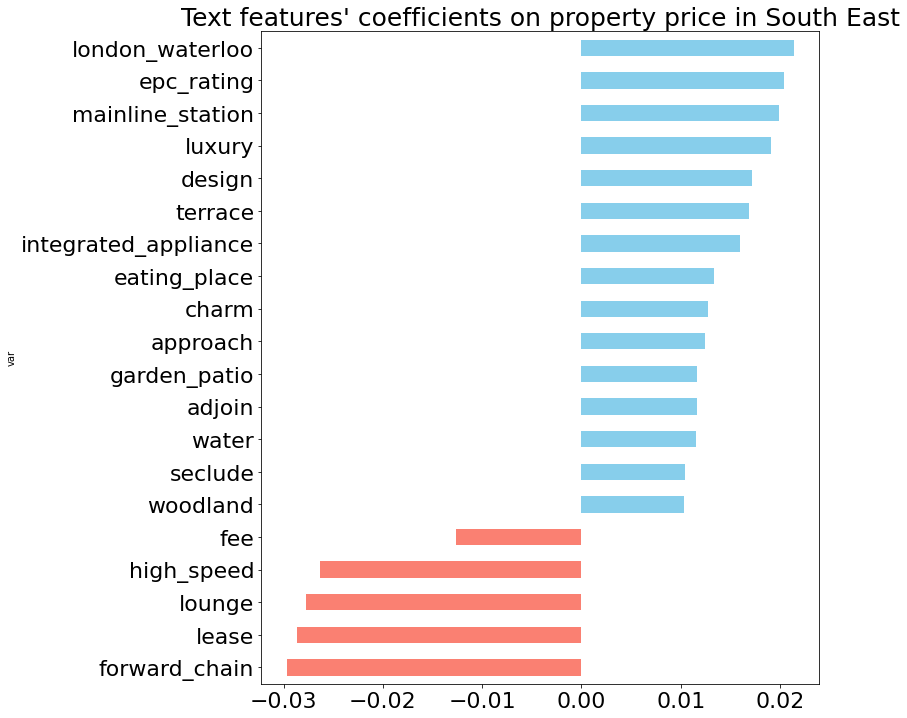

In [96]:
%%time
lasso_and_plot(list_useless_South_East, table_tfidf_South_East, UK_2019sale_month67_South_East,'South East')

F:\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


lasso_model.score:  0.6515236765656387
R-squared value:  0.6515236765656387
RMSE value:  0.3460606089314054
Wall time: 12.5 s


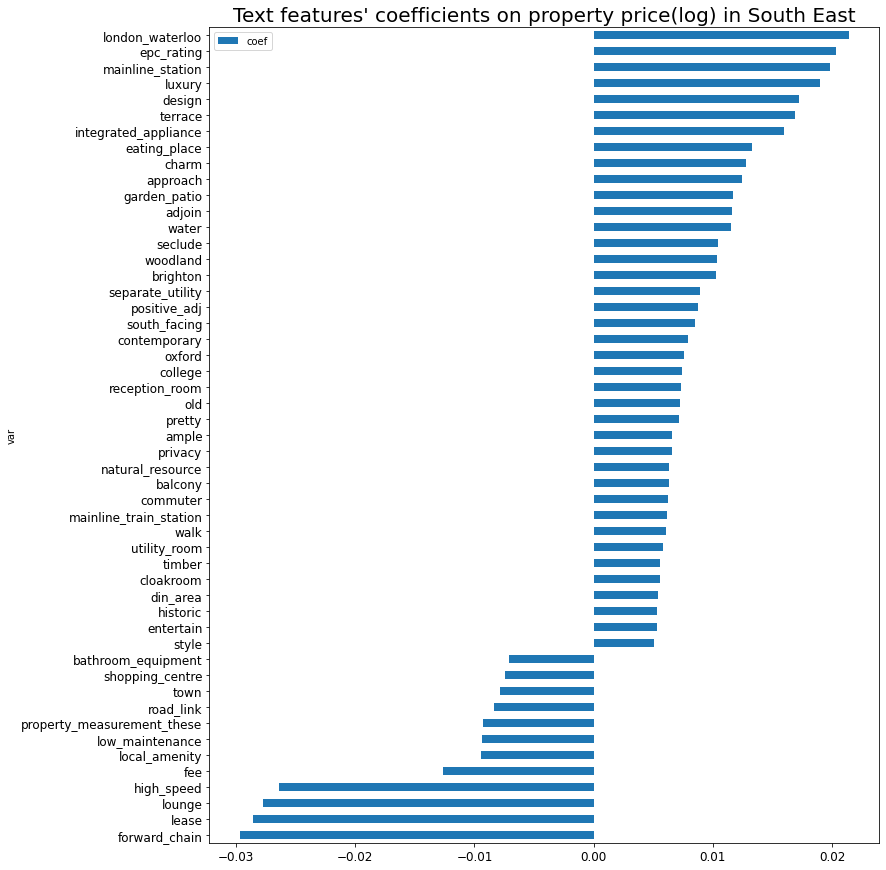

In [280]:
%%time
lasso_and_plot(list_useless_South_East, table_tfidf_South_East, UK_2019sale_month67_South_East,'South East')

## South_West

In [97]:
UK_2019sale_month67_South_West = pd.read_csv('data_region/UK_2019sale_month67_South West (England).csv')

In [98]:
table_tfidf_South_West = find_text_feature(UK_2019sale_month67_South_West)

In [208]:
table_tfidf_South_West.sum().sort_values(ascending=False).index.tolist()

['heating_equipment',
 'garden_patio',
 'positive_adj',
 'garage_place',
 'natural_resource',
 'good_size',
 'bathroom_equipment',
 'lounge',
 'modern',
 'kitchen_equipment',
 'parking_area',
 'park',
 'conservatory',
 'ceiling_light',
 'school',
 'enjoy',
 'shopping_place',
 'town',
 'driveway',
 'cupboard',
 'tile',
 'utility_room',
 'french_door',
 'cloakroom',
 'other_transport',
 'small',
 'laminate_flooring',
 'wardrobe',
 'communal',
 'elevation',
 'eating_place',
 'tile_flooring',
 'wooden',
 'walk',
 'extractor_fan',
 'open_plan',
 'coved_ceiling',
 'town_centre',
 'carpet',
 'boiler',
 'carpet_flooring',
 'reception_room',
 'bristol',
 'terrace',
 'central',
 'style',
 'timber',
 'wood',
 'loft',
 'fully_tile',
 'exeter',
 'balcony',
 'contemporary',
 'city',
 'stair_first',
 'tile_wall',
 'sitting_room',
 'water',
 'gas',
 'oak',
 'original',
 'entrance_hallway',
 'mirror',
 'tiled_floor',
 'light_point',
 'din_area',
 'north',
 'plenty',
 'loft_space',
 'south',
 'close_cou

In [99]:
list_uesless_South_West = [ 'run','verification_from_their_solicitor', 'cupboard_under',
 'mixer_tap_over', 'will_find','left_hand_side', 'step_lead','work',
 'estate_agent', 'vehicle',
 'right_hand',
 'dual_aspect',
 'pretty',
 'follow',
 'approximately_mile',
 'several',
 'unit_with_mixer_tap', 'all_offer_contract', 'din', 'country','deep', 'view_across',
 'rise',
 'lie',
 'left',
 'site',
 'approach',
 'field',
 'time',
 'raise','day', 'near','residential',
 'boundary','fine','shelve', 'outbuilding',
 'wide',
 'character',

 'twin',
 'please_note_that',
 'long',
 'not_seek_verify',
 'legal_title_the_property',
 'sale_these_particular',
 'range_match',
 'shower_attachment',
 'description']

In [58]:
lasso_train_test(list_uesless_South_West, table_tfidf_South_West, UK_2019sale_month67_South_West,'South West')

F:\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


R2 on the training data:  0.5956083535069031
RMSE on the training data:  0.346193460998055
R2 on the test data:  0.6078989688972246
RMSE on the test data:  0.3424972444232799


F:\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


R2 on all data:  0.6102482115805706
RMSE on all data:  0.34085689028342625
Wall time: 4.54 s


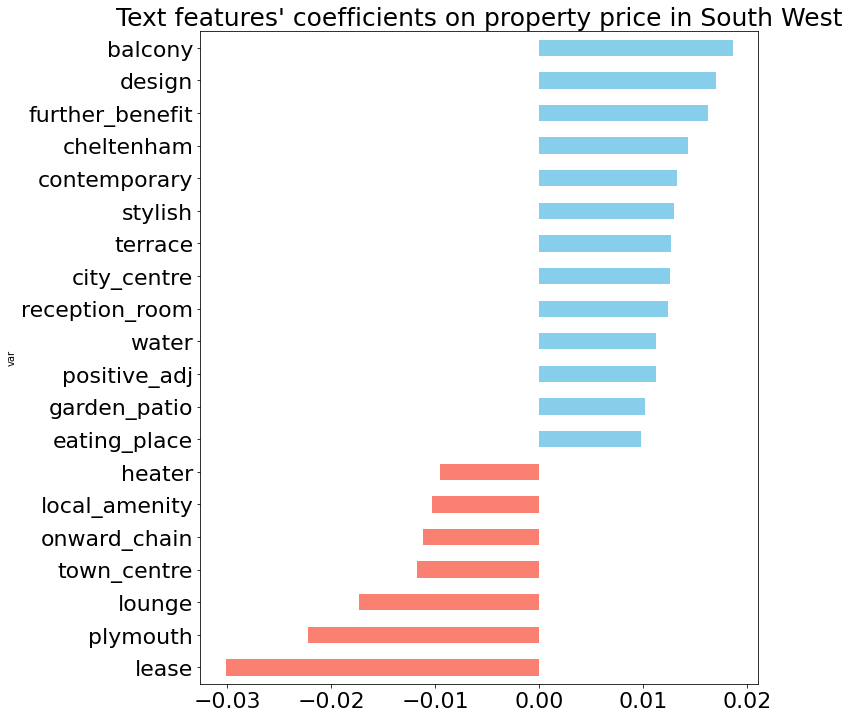

In [100]:
%%time
lasso_and_plot(list_uesless_South_West, table_tfidf_South_West, UK_2019sale_month67_South_West,'South West')

## Wales

In [101]:
UK_2019sale_month67_Wales = pd.read_csv('data_region/UK_2019sale_month67_Wales.csv')

In [60]:
UK_2019sale_month67_Wales.shape

(8568, 38)

In [102]:
table_tfidf_Wales = find_text_feature(UK_2019sale_month67_Wales)

In [215]:
table_tfidf_Wales.sum().sort_values(ascending=False).index.tolist()

['heating_equipment',
 'garden_patio',
 'positive_adj',
 'bathroom_equipment',
 'garage_place',
 'lounge',
 'good_size',
 'natural_resource',
 'carpet',
 'laminate_flooring',
 'modern',
 'kitchen_equipment',
 'tile',
 'parking_area',
 'pvcu_double',
 'conservatory',
 'driveway',
 'tile_flooring',
 'coved_ceiling',
 'ceiling_light',
 'utility_room',
 'school',
 'park',
 'french_door',
 'carpet_flooring',
 'other_transport',
 'shopping_place',
 'reception_room',
 'wooden',
 'open_plan',
 'cupboard',
 'town',
 'enjoy',
 'elevation',
 'cloakroom',
 'pvc',
 'small',
 'tile_wall',
 'extractor_fan',
 'textured_ceiling',
 'wardrobe',
 'timber',
 'original',
 'boiler',
 'walk',
 'loft',
 'central',
 'stair_first',
 'ample',
 'style',
 'entrance_hallway',
 'oak',
 'wood',
 'fully_tile',
 'town_centre',
 'tiled_floor',
 'cardiff',
 'spotlight',
 'local_amenity',
 'communal',
 'terrace',
 'eating_place',
 'pvcu',
 'balcony',
 'lay',
 'alcove',
 'vanity_unit',
 'attic',
 'traditional',
 'fore',
 'd

In [103]:
list_useless_Wales = ['plumb_for_automatic_washing', 'piece_suite_comprise',
 'inner', 'pathway', 'check', 'worktops','left', 'fire','obscure_glass','write_consent_the_website_owner',
 'otherwise_make_the_material_available', 'description',
 'enter_via', 'this_website',
 'approach',
 'any_other_medium',
 'copyright_must_remain_all',
 'reproduction_material_take',
 'website_owner_express_prior',
 'same_available_hard_copy',
 'not_republish_retransmit_redistribute',
 'any_website_online',
 'service_bulletin_board_your',
 'vehicle',
 'slate',
 'boundary',
 'enter', 'left_hand_side', 'splash_back',
 'toilet','turn',
 'see', 'screen',
 'country',
 'follow',
 'seat_area',
 'appointment',
 'personal_use_and_research_you',
 'store_and_use',
 'material_for_your_own',
 'you_may_download',
 'proceed', 'part_offer_contract',
 'large_than_average',
 'chrome_heat_towel_rail',
 'right_hand',
 'ideal_first_time',
 'approximately_mile',
 'shower_enclosure',
 'path',
 'inset_stainless_steel',
 'range_match']

In [64]:
lasso_train_test(list_useless_Wales, table_tfidf_Wales, UK_2019sale_month67_Wales,'Wales')

F:\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


R2 on the training data:  0.6280996840349555
RMSE on the training data:  0.37038566265853096
R2 on the test data:  0.5834624774306385
RMSE on the test data:  0.3894858864856189


F:\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


R2 on all data:  0.6197599193714646
RMSE on all data:  0.3731030379889813
Wall time: 1.15 s


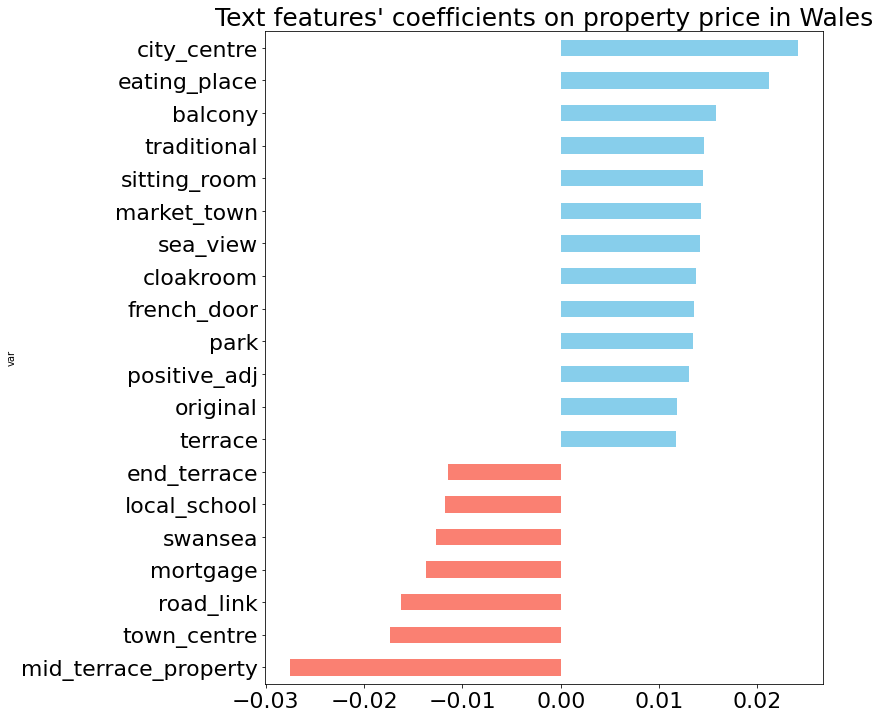

In [104]:
%%time
lasso_and_plot(list_useless_Wales, table_tfidf_Wales, UK_2019sale_month67_Wales,'Wales')

## West_Midlands

In [105]:
UK_2019sale_month67_West_Midlands = pd.read_csv('data_region/UK_2019sale_month67_West Midlands (England).csv')

In [106]:
table_tfidf_West_Midlands = find_text_feature(UK_2019sale_month67_West_Midlands)

In [221]:
table_tfidf_West_Midlands.shape

(14020, 200)

In [222]:
table_tfidf_West_Midlands.sum().sort_values(ascending=False).index.tolist()

['heating_equipment',
 'garden_patio',
 'ceiling_light',
 'positive_adj',
 'garage_place',
 'lounge',
 'bathroom_equipment',
 'good_size',
 'elevation',
 'modern',
 'kitchen_equipment',
 'conservatory',
 'natural_resource',
 'parking_area',
 'driveway',
 'tile',
 'laminate_flooring',
 'other_transport',
 'carpet',
 'park',
 'school',
 'utility_room',
 'french_door',
 'shopping_place',
 'reception_room',
 'tile_flooring',
 'cupboard',
 'wardrobe',
 'carpet_flooring',
 'enjoy',
 'open_plan',
 'breakfast',
 'into_bay',
 'extractor_fan',
 'town_centre',
 'entrance_hallway',
 'town',
 'communal',
 'style',
 'boiler',
 'birmingham',
 'walk',
 'light_point',
 'stair_first',
 'coving_ceiling',
 'wooden',
 'upward_chain',
 'cloakroom',
 'small',
 'into_recess',
 'contemporary',
 'eating_place',
 'loft',
 'local_amenity',
 'fore',
 'reception_hall',
 'tile_wall',
 'din_area',
 'timber',
 'oak',
 'verification_from_their_solicitor',
 'legal_title_the_property',
 'ceiling_spotlight',
 'not_seek_ve

In [107]:
list_useless_West_Midlands = ['fully_appreciate','fire','this_well_present','follow', 'advise',
 'verify', 'vehicle','their_solicitor_surveyor', 'set_back', 'advise_that', 'not_constitute_part',
 'money_laundering_regulation_intend', 'din','not_seek_verify', 'verification_from_their_solicitor',
 'legal_title_the_property', 'small','walk',
 'into_recess',
 'buyer_must_obtain',
 'all_offer_contract',
 'description', 'work','check_the_working_condition','consider_incorrect_potential_buyer',
 'advise_recheck_the_measurement_before',
 'measurement_indicate_supply',
 'guidance_only_and_such_must',
 'sale_these_particular',
 'fitting_service_and_the_buyer_interest','max_into',
 'plenty', 'original',
 'any_appliance_connells',
 'commit_any_expense_connells',
 'contact',
 'summary',
 'base_unit_with_work_surface', 'approach',
 'estate_agent',
 'roll_top_work_surface',
 'close_couple',
 'pathway_lead', 'please_note','fixture_fitting','must', 'pathway',
 'must_view', 'fixture_and_fitting',
 'please_note_that',
 'briefly_comprises',
 'vanity_wash_hand',
 'floor_landing',
 'approach_via',
 'easy',
 'popular_location',
 'condition',
 'time',
 'rise',
 'beneath',
 'white_suite_comprise',
 'step_lead',
 'range_match',
 'near',
 'work_order_fit',]

In [68]:
lasso_train_test(list_useless_West_Midlands, table_tfidf_West_Midlands, UK_2019sale_month67_West_Midlands,'West Midlands')

F:\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


R2 on the training data:  0.6510545032128847
RMSE on the training data:  0.3225988837470001
R2 on the test data:  0.6107796743456233
RMSE on the test data:  0.3320350218263122


F:\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


R2 on all data:  0.6357147218314999
RMSE on all data:  0.3246114968558367
Wall time: 1.48 s


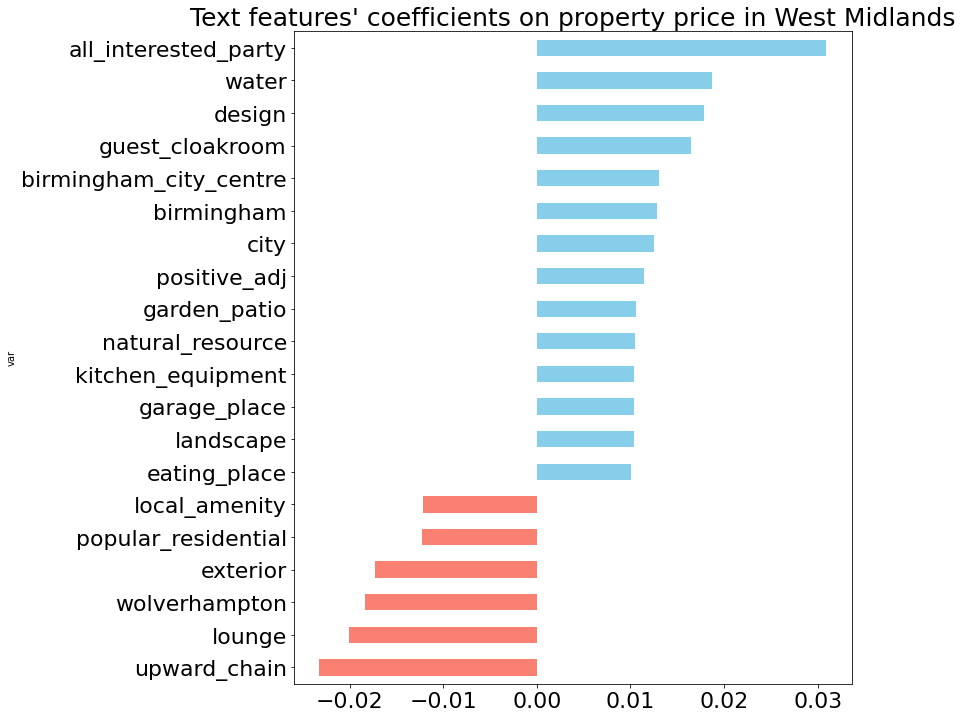

In [108]:
%%time
lasso_and_plot(list_useless_West_Midlands, table_tfidf_West_Midlands, UK_2019sale_month67_West_Midlands,'West Midlands')

## Yorkshire and The Humber

In [109]:
UK_2019sale_month67_Yorkshire_and_The_Humber = pd.read_csv('data_region/UK_2019sale_month67_Yorkshire and The Humber.csv')

In [110]:
table_tfidf_Yorkshire_and_The_Humber = find_text_feature(UK_2019sale_month67_Yorkshire_and_The_Humber)

In [228]:
table_tfidf_Yorkshire_and_The_Humber.shape

(14027, 200)

In [227]:
table_tfidf_Yorkshire_and_The_Humber.sum().sort_values(ascending=False).index.tolist()

['heating_equipment',
 'garden_patio',
 'positive_adj',
 'good_size',
 'garage_place',
 'lounge',
 'bathroom_equipment',
 'modern',
 'parking_area',
 'kitchen_equipment',
 'natural_resource',
 'conservatory',
 'other_transport',
 'driveway',
 'elevation',
 'ceiling_light',
 'tile',
 'park',
 'school',
 'laminate_flooring',
 'carpet',
 'enjoy',
 'shopping_place',
 'french_door',
 'utility_room',
 'open_plan',
 'coving_the_ceiling',
 'cupboard',
 'style',
 'din',
 'wardrobe',
 'facing',
 'reception_room',
 'walk',
 'front_facing',
 'pvcu_double',
 'eating_place',
 'extractor_fan',
 'contemporary',
 'small',
 'timber',
 'leeds',
 'carpet_flooring',
 'fully_tile',
 'local_amenity',
 'town',
 'stylish',
 'central',
 'loft',
 'cellar',
 'tile_flooring',
 'boiler',
 'cloakroom',
 'entrance_hallway',
 'communal',
 'din_area',
 'wooden',
 'town_centre',
 'breakfast',
 'terrace',
 'ample',
 'sheffield',
 'city_centre',
 'tile_wall',
 'city',
 'driveway_provide',
 'oak',
 'york',
 'vanity_unit',


In [111]:
list_useless_Yorkshire_and_The_Humber = [ 'good_range', 'integral', 'long',
 'run', 'corner_plot', 'screen','not_miss','briefly_comprises_entrance_hall',
 'briefly_comprises', 'money_launder_regulation_intend',
 'staircase_lead','sale_general_while_endeavour', 'accommodation_briefly',
 'fair_accurate_and_reliable_they', 'accurate_and_reliable_however', 'they_not_constitute',
 'only_general_guide',
 'really', 'important_note_purchaser_endeavour',
 'property_measurement_these',
 'must_view',
 'set_within',
 'please_note',
 'opportunity', 'feel','inset_sink', 'time', 'particular',
 'chrome_heat_towel_rail',
 'privacy',
 'currently_use',
 'range_fitted',
 'ladder',
 'open_plan_live',
 'arrange',
 'grow_family',
 'today',
 'first_floorbedroom']

In [72]:
lasso_train_test(list_useless_Yorkshire_and_The_Humber, table_tfidf_Yorkshire_and_The_Humber, UK_2019sale_month67_Yorkshire_and_The_Humber,'Yorkshire and The Humber')

F:\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


R2 on the training data:  0.6472349430138569
RMSE on the training data:  0.35279189503392305
R2 on the test data:  0.5923237352769339
RMSE on the test data:  0.38124544174061825


F:\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


R2 on all data:  0.6021915487168127
RMSE on all data:  0.3758229430749714
Wall time: 1.76 s


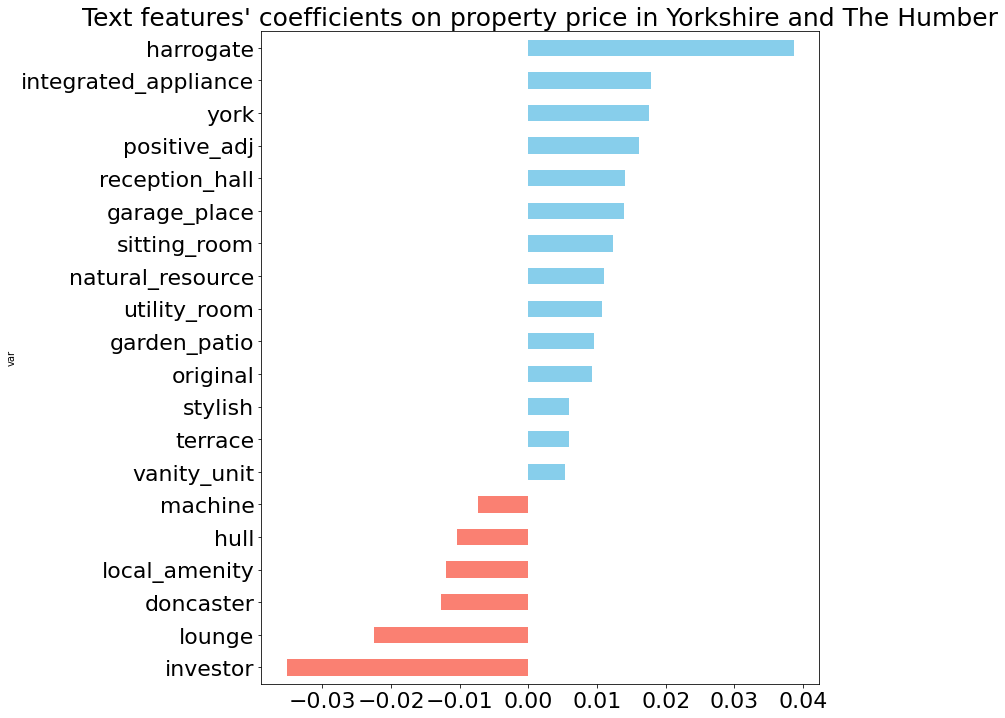

In [112]:
%%time
lasso_and_plot(list_useless_Yorkshire_and_The_Humber, table_tfidf_Yorkshire_and_The_Humber, UK_2019sale_month67_Yorkshire_and_The_Humber,'Yorkshire and The Humber')

F:\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


lasso_model.score:  0.6021915487168127
R-squared value:  0.6021915487168127
RMSE value:  0.3758229430749714
Wall time: 6.71 s


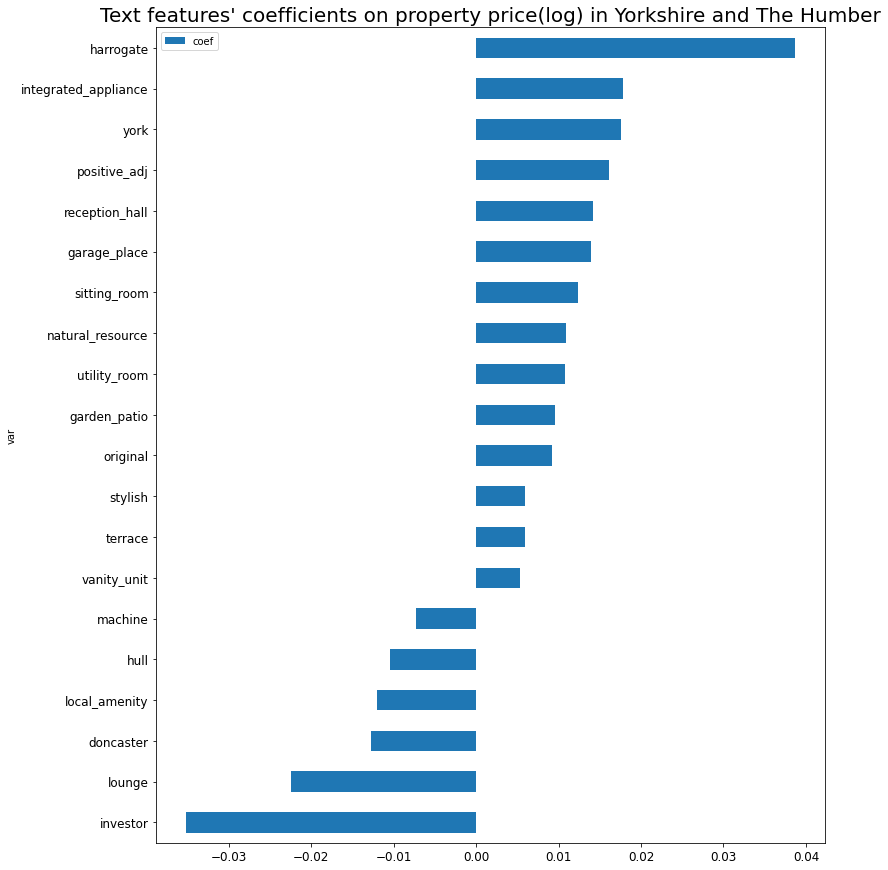

In [285]:
%%time
lasso_and_plot(list_useless_Yorkshire_and_The_Humber, table_tfidf_Yorkshire_and_The_Humber, UK_2019sale_month67_Yorkshire_and_The_Humber,'Yorkshire and The Humber')